In [1]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import binom
import pylab
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale= 1)

# Statistical hypothesis testing

- A Hypothesis test is a method of Statistical Inferenace used to decide wheather the data at hand sufficiently support a particular hypothesis.
- Hypothesis testing allows us to make probabilistic statements about population parameters . 

- Statistical hypothesis: A statement about the parameters describing a population (not a sample).

- Test statistic: A value calculated from a sample without any unknown parameters, often to summarize the sample for comparison purposes.

- Simple hypothesis: Any hypothesis which specifies the population distribution completely.

- Composite hypothesis: Any hypothesis which does not specify the population distribution completely.
- Null hypothesis (H0)

- Positive data: Data that enable the investigator to reject a null hypothesis.

- Alternative hypothesis (H1)

- Region of rejection / Critical region: The set of values of the test statistic for which the null hypothesis is rejected.

- Critical value

- Power of a test (1 − β)

- Size: For simple hypotheses, this is the test's probability of incorrectly rejecting the null hypothesis. The false positive rate. For composite hypotheses this is the supremum of the probability of rejecting the null hypothesis over all cases covered by the null hypothesis. 
- The complement of the false positive rate is termed specificity in biostatistics. ("This is a specific test. Because the result is positive, we can confidently say that the patient has the condition.")

- Significance level of a test (α)
- p-value


>- Statistical significance test: A predecessor to the statistical hypothesis test . An experimental result was said to be statistically significant if a sample was sufficiently inconsistent with the (null) hypothesis.
>- This was variously considered common sense, a pragmatic heuristic for identifying meaningful experimental results, a convention establishing a threshold of statistical evidence or a method for drawing conclusions from data.
>- The statistical hypothesis test added mathematical rigor and philosophical consistency to the concept by making the alternative hypothesis explicit. The term is loosely used for the modern version which is now part of statistical hypothesis testing.

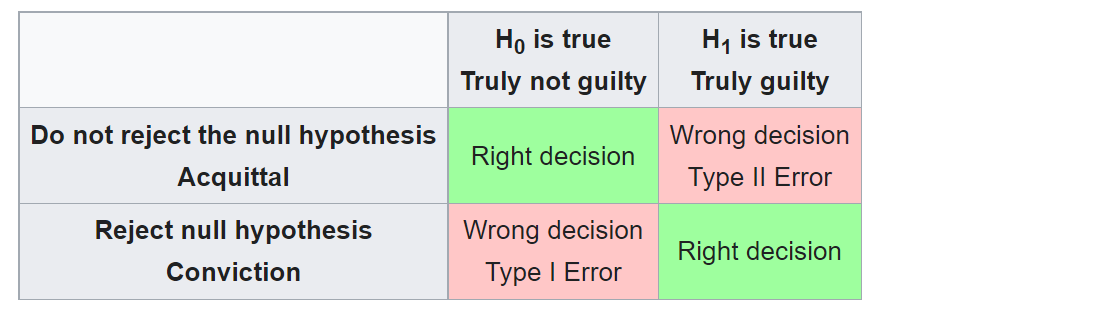

## statistical significance

- In statistical hypothesis testing, a result has statistical significance when it is very unlikely to have occurred given the null hypothesis.
- More precisely, a study's defined significance level, denoted by alpha , is the probability of the study rejecting the null hypothesis, given that the null hypothesis is true; and the p-value of a result, p is the probability of obtaining a result at least as extreme, given that the null hypothesis is true.
- The result is statistically significant, by the standards of the study, when p is less than alpha .
- The significance level for a study is chosen before data collection, and is typically set to 5% or much lower—depending on the field of study.

## p-value : 

-  In null-hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct.
- A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis.

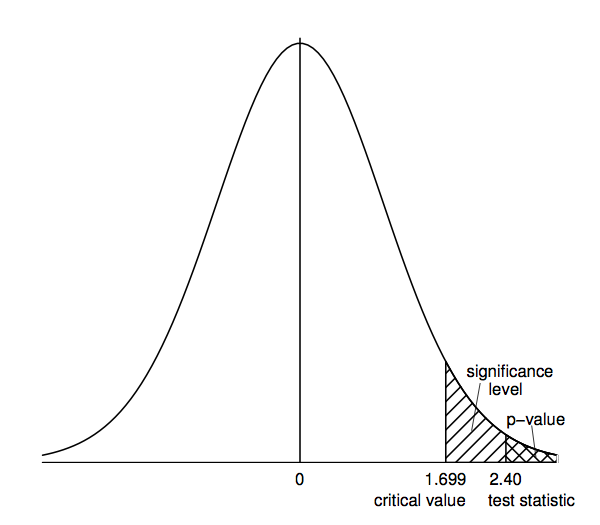

# Example : 

> ##### If a coin is fair or biased towards Heads . 

- Null Hypothesis 
            H0 = coin is fair
- Alternative Hypothesis
            Ha = Coin is biased towards Heads


- Experiment : Toss coin 100 times

- Test Statistic(T)  : # number of Heads in 100 tosses. 


lets assume: 

- We tossed 100 times and got 65 heads out of 100 tosses. (T(observed) )

- Probabiliy 

               P(observing 65 or more heads | coin is fair) = ? 
               P(65 Heads | H0) = ?
               P(Test Statistics >= 65| H0) = ? 
               
               

In [2]:

# given H0 , T ~ Binomial(n = 100,p = 0.5)

# P(Heads >= 65 | H0)
# 1 - P(Heads < 65)
1-stats.binom.cdf(64,100,0.5)   # cdf(k, n, p, loc=0)

<IPython.core.display.Javascript object>

0.0017588208614850442

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

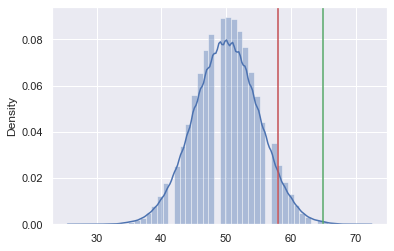

In [3]:
X = stats.binom.rvs(n=100,p=0.5,size = 100000)
sns.distplot(X)
plt.axvline(x = 65,c = "g")

# critical val
T_Critical =  stats.binom.ppf(0.95,100,0.5)     #q, n, p
plt.axvline(x = T_Critical,c = "r")



In [4]:
stats.binom.ppf(0.95,100,0.5)  

<IPython.core.display.Javascript object>

58.0

    (observedT = 65) > (criticalT = 58)

    thus we failed to reject null hypothesis of coin being fair . 
    so , we can conclude coin being biased towards Heads with 95% confidence . 

    two cases : 

    when H0 is true:             when Ha is True
    Coin is fair                 Coin is biased towards heads

    based on observation:
    65H/100Tosses = 0.17% which is less than 0.5 (level of significance)

    Therefore, we reject null Hypothesis. 
    and we can experiment further under Alternative Hypothesis. 


In [5]:
# if we get 52 heads out of 100 coin tosses. 
1-stats.binom.cdf(51,100,0.5)   # cdf(k, n, p, loc=0)

<IPython.core.display.Javascript object>

0.3821767172013337

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

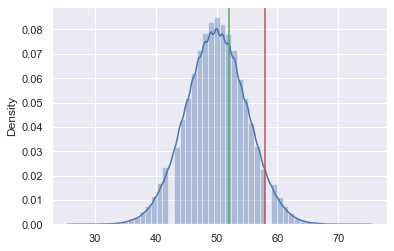

In [6]:
X = stats.binom.rvs(n=100,p=0.5,size = 100000)
sns.distplot(X)
plt.axvline(x = 52,c = "g")
# critical val
T_Critical =  stats.binom.ppf(0.95,100,0.5)     #q, n, p
plt.axvline(x = T_Critical,c = "r")


In [7]:
0.3821767172013337<0.05
# we failed to reject null hypothesis so , the coin is fair.

False

    what if we got 5 heads from 100 tosses : 

        H0: fair coin
        Ha: coin is biased towards heads (clearly coin is not biased to H,
                                                         but biased to tails.)

            , we have to formulate our alternative hypothesis to 
            either Coin is unfair
            or 
             Coin is biased towards Tails.

In [8]:
# if we get 5 heads out of 100 coin tosses. 
1-stats.binom.cdf(4,100,0.5)   # cdf(k, n, p, loc=0)

<IPython.core.display.Javascript object>

1.0

In [9]:
1 < 0.05  # we failed to reject null hypothesis ,  the coin is fair ! , but actually the coin is tail biased .  

False

In [10]:
# if Ha is Coin is biased towards Tails : 
#     and we observe 40 heads / 100
#            or we can say 
#         we observed 60 Tails / 100 


In [11]:
stats.binom.cdf(40,100,0.5)    # probabilit of heads less than 40

<IPython.core.display.Javascript object>

0.02844396682049044

In [12]:
1-stats.binom.cdf(59,100,0.5)  # probability of tails more than 60

<IPython.core.display.Javascript object>

0.02844396682049044

In [13]:
0.028<0.05
# so we reject null and say that coin is biased towards Tails. 

True

In [14]:
stats.binom.cdf(4,100,0.5) # in 5 Heads in 100 tosse case : 

<IPython.core.display.Javascript object>

3.224844447881771e-24

In [15]:
3.224844447881771e-24 < 0.05

True

In [16]:
# plotting pdf of binomial (100,0.5)

X = stats.binom.rvs(n=100,p=0.5,size = 100000)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

T_Critical1 = 40.0
T_Critical2 = 60.0


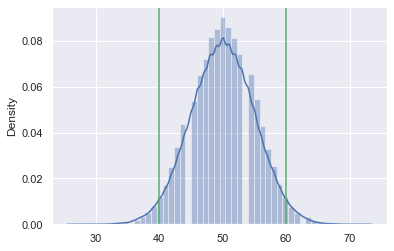

In [17]:
sns.distplot(X)
# critical val
T_Critical1 =  stats.binom.ppf(0.025,100,0.5)     #q, n, p
plt.axvline(x = T_Critical1,c = "g")
# critical val
T_Critical2 =  stats.binom.ppf(0.975,100,0.5)     #q, n, p
plt.axvline(x = T_Critical2,c = "g")
print("T_Critical1 =", T_Critical1)
print("T_Critical2 =", T_Critical2)


In [18]:
stats.binom.ppf(0.025,100,0.5)  ,stats.binom.ppf(0.975,100,0.5)  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(40.0, 60.0)

# Hypothesis Test Variations : 


#### Hypothesis Variation 1 : 
    
    - H0: Coin is fair 
    - Ha: Coin is biased towards H
   - `right tailed test `
   - P(observing T as extream or more than T-observed | H0)
   - P(T  >= Tobs | H0)
 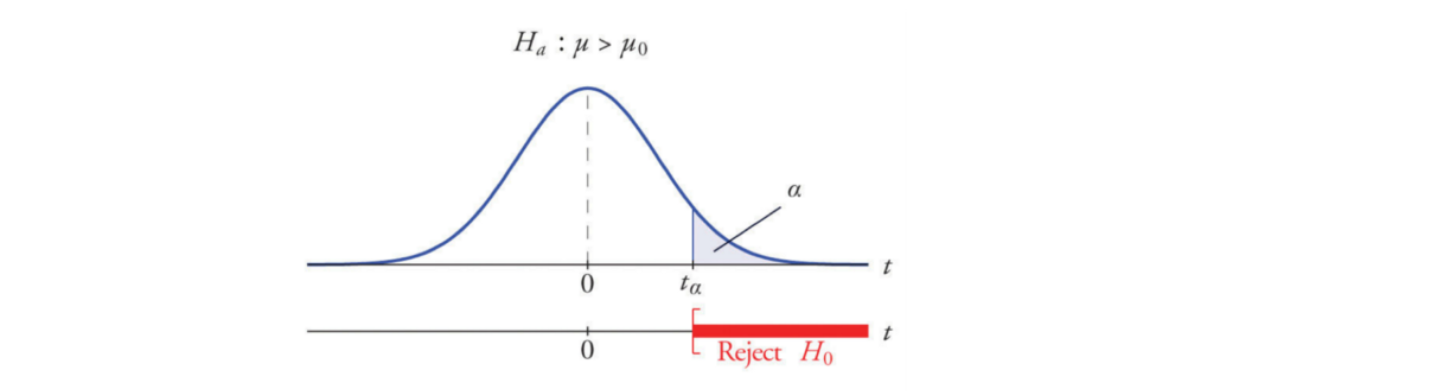 
       
#### Hypothesis Variation 2 : 
    
    - H0: Coin is fair 
    - Ha: Coin is biased towards T
   - `Left tailed test `
   - P(observing T as extream or less than T-observed | H0)
   - P(T  <= Tobs | H0)
 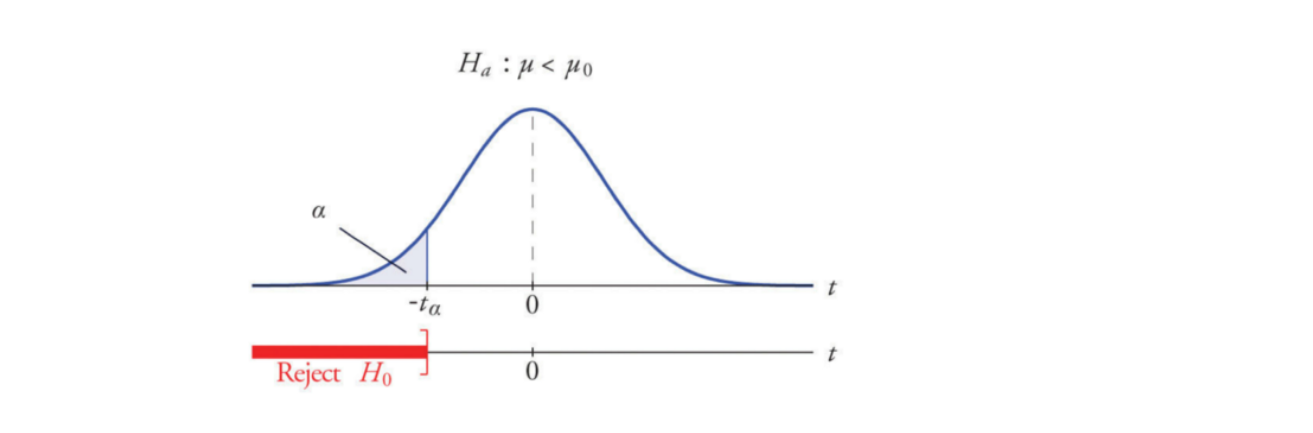 
   
        
#### Hypothesis Variation 3 : 
    
    - H0: Coin is fair 
    - Ha: Coin is biased
   
   - P(observing T as extream or less or more than T-observed | H0)
   - P( Tobs <= T  <= Tobs | H0)
            
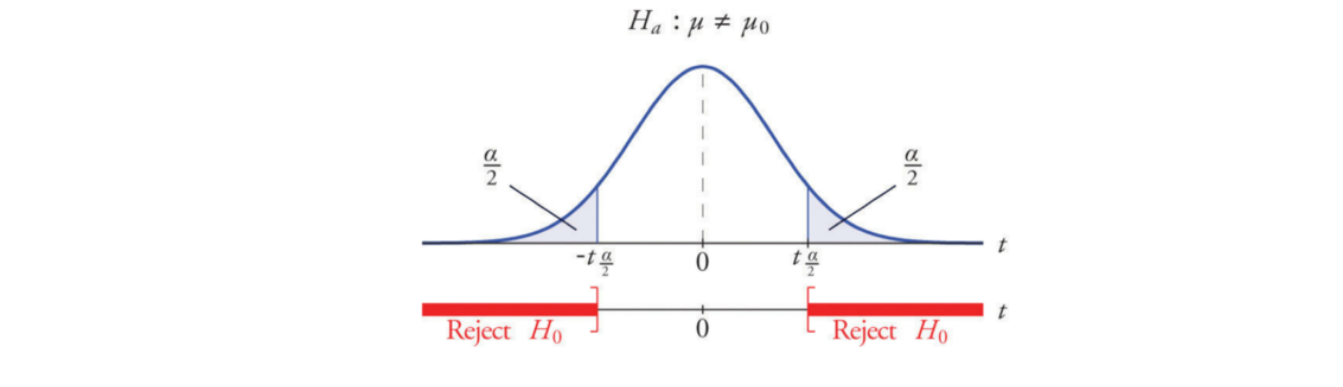
        

# Frame work of Hypothesis Testing : 

> There is an initial research hypothesis of which the truth is unknown.

`1.` The first step is to state the relevant null and alternative hypotheses.

`2.` The second step is to consider the statistical assumptions being made about the sample in doing the test; for example, assumptions about the statistical independence or about the form of the distributions of the observations. This is equally important as invalid assumptions will mean that the results of the test are invalid.


`3. `Decide which test is appropriate, and state the relevant test statistic T.
- left sided or right sided or 2Sided Test



`4.` Derive the distribution of the test statistic under the null hypothesis from the assumptions. 
- In standard cases this will be a well-known result. For example, the test statistic might follow a Student's t distribution with known degrees of freedom, or a normal distribution with known mean and variance.
- If the distribution of the test statistic is completely fixed by the null hypothesis we call the hypothesis simple, otherwise it is called composite.


`5.` Select a significance level (α), a probability threshold below which the null hypothesis will be rejected. Common values are 5% and 1%



`6.` The distribution of the test statistic under the null hypothesis partitions the possible values of T into those for which the null hypothesis is rejected—the so-called critical region—and those for which it is not. 
- The probability of the critical region is α. In the case of a composite null hypothesis, the maximal probability of the critical region is α.


`7.` Compute from the observations the observed value T-obs of the test statistic T.

`8.` Decide to either reject the null hypothesis in favor of the alternative or not reject it. 
- The decision rule is to reject the null hypothesis H0 if the observed value tobs is in the critical region, and not to reject the null hypothesis otherwise.



- Compute from the observations the observed value T-obs of the test statistic T.

- Calculate the p-value. This is the probability, under the null hypothesis, of sampling a test statistic at least as extreme as that which was observed (the maximal probability of that event, if the hypothesis is composite).
- Reject the null hypothesis, in favor of the alternative hypothesis, if and only if the p-value is less than (or equal to) the significance level (the selected probability) threshold (α).

# Type I and type II errors


- In statistical test theory, the notion of a statistical error is an integral part of hypothesis testing. 
- The test goes about choosing about two competing propositions called null hypothesis, denoted by H0 and alternative hypothesis, denoted by H1.
- This is conceptually similar to the judgement in a court trial.
- The null hypothesis corresponds to the position of the defendant: just as he is presumed to be innocent until proven guilty, so is the null hypothesis presumed to be true until the data provide convincing evidence against it.
- The alternative hypothesis corresponds to the position against the defendant. 
- Specifically, the null hypothesis also involves the absence of a difference or the absence of an association.
- Thus, the null hypothesis can never be that there is a difference or an association.



- If the result of the test corresponds with reality, then a correct decision has been made. 
- However, `if the result of the test does not correspond with reality, then an error has occurred.`
- There are two situations in which the decision is wrong. 

- The null hypothesis may be true, whereas we reject H0. 
- On the other hand, the alternative hypothesis H1 may be true, whereas we do not reject H0. 
- Two types of error are distinguished: type I error and type II error.

### Type I error  : 
- The first kind of error is the mistaken rejection of a null hypothesis as the result of a test procedure.
- This kind of error is called a type I error (false positive) and is sometimes called an error of the first kind.
- In terms of the courtroom example, a type I error corresponds to convicting an innocent defendant.

### Type II error : 
- The second kind of error is the mistaken failure to reject the null hypothesis as the result of a test procedure.
- This sort of error is called a type II error (false negative) and is also referred to as an error of the second kind.
- In terms of the courtroom example, a type II error corresponds to acquitting a criminal.

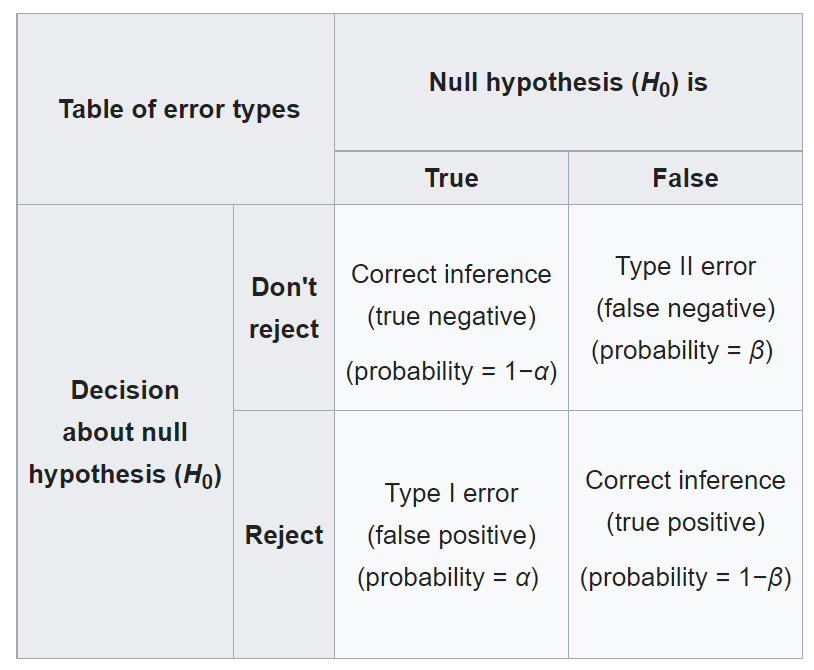

#### The statistical power
- The statistical power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis H0 when a specific alternative hypothesis H1 is true. 
- It is commonly denoted by 1-beta , and represents the chances of a "true positive" detection conditional on the actual existence of an effect to detect.
- Statistical power ranges from 0 to 1, and as the power of a test increases, the probability beta  of making a type II error by wrongly failing to reject the null hypothesis decreases.

# Thinking about Hypothesis : 

- when trying to formulate a statistical hypothesis: 

        - Am i testing an assumption or the status que, that already exists ? .

        - or am i testing a claim or asssertion beyond what i already know or can know ?
        
- null and alternative hypothesis are opposite , mutually exclusive
- null either rejecte or not ! only if null is rejected we can proceed to the alternative .


> null hypothesis : this is accepted as true, and further we test it ! (given , status quo)
(Null means nothing new / different | assumption maintained.)

> this might be true, we test it. and if not, truth is something else. (unknown , claim/arrertion)
The alternative is the other option when the null is rejected .


- all statistical conclusions are made in reference to the null hypothesis.
- as researchers we either reject or fail to reject null hypothesis. 
- if we reject null hypothesis , then we conclude that the data supports the alternative hypothesis. 



    H0 : µ  = µ0
    
    Ha : µ != µ0
        
        µ  is actual mean of the population 
        µ0 is hypothesied mean of the population 
    
    "Does the actual mean align with the hypothesized mean ?
    We will test this question using sample means and confidence intervals."

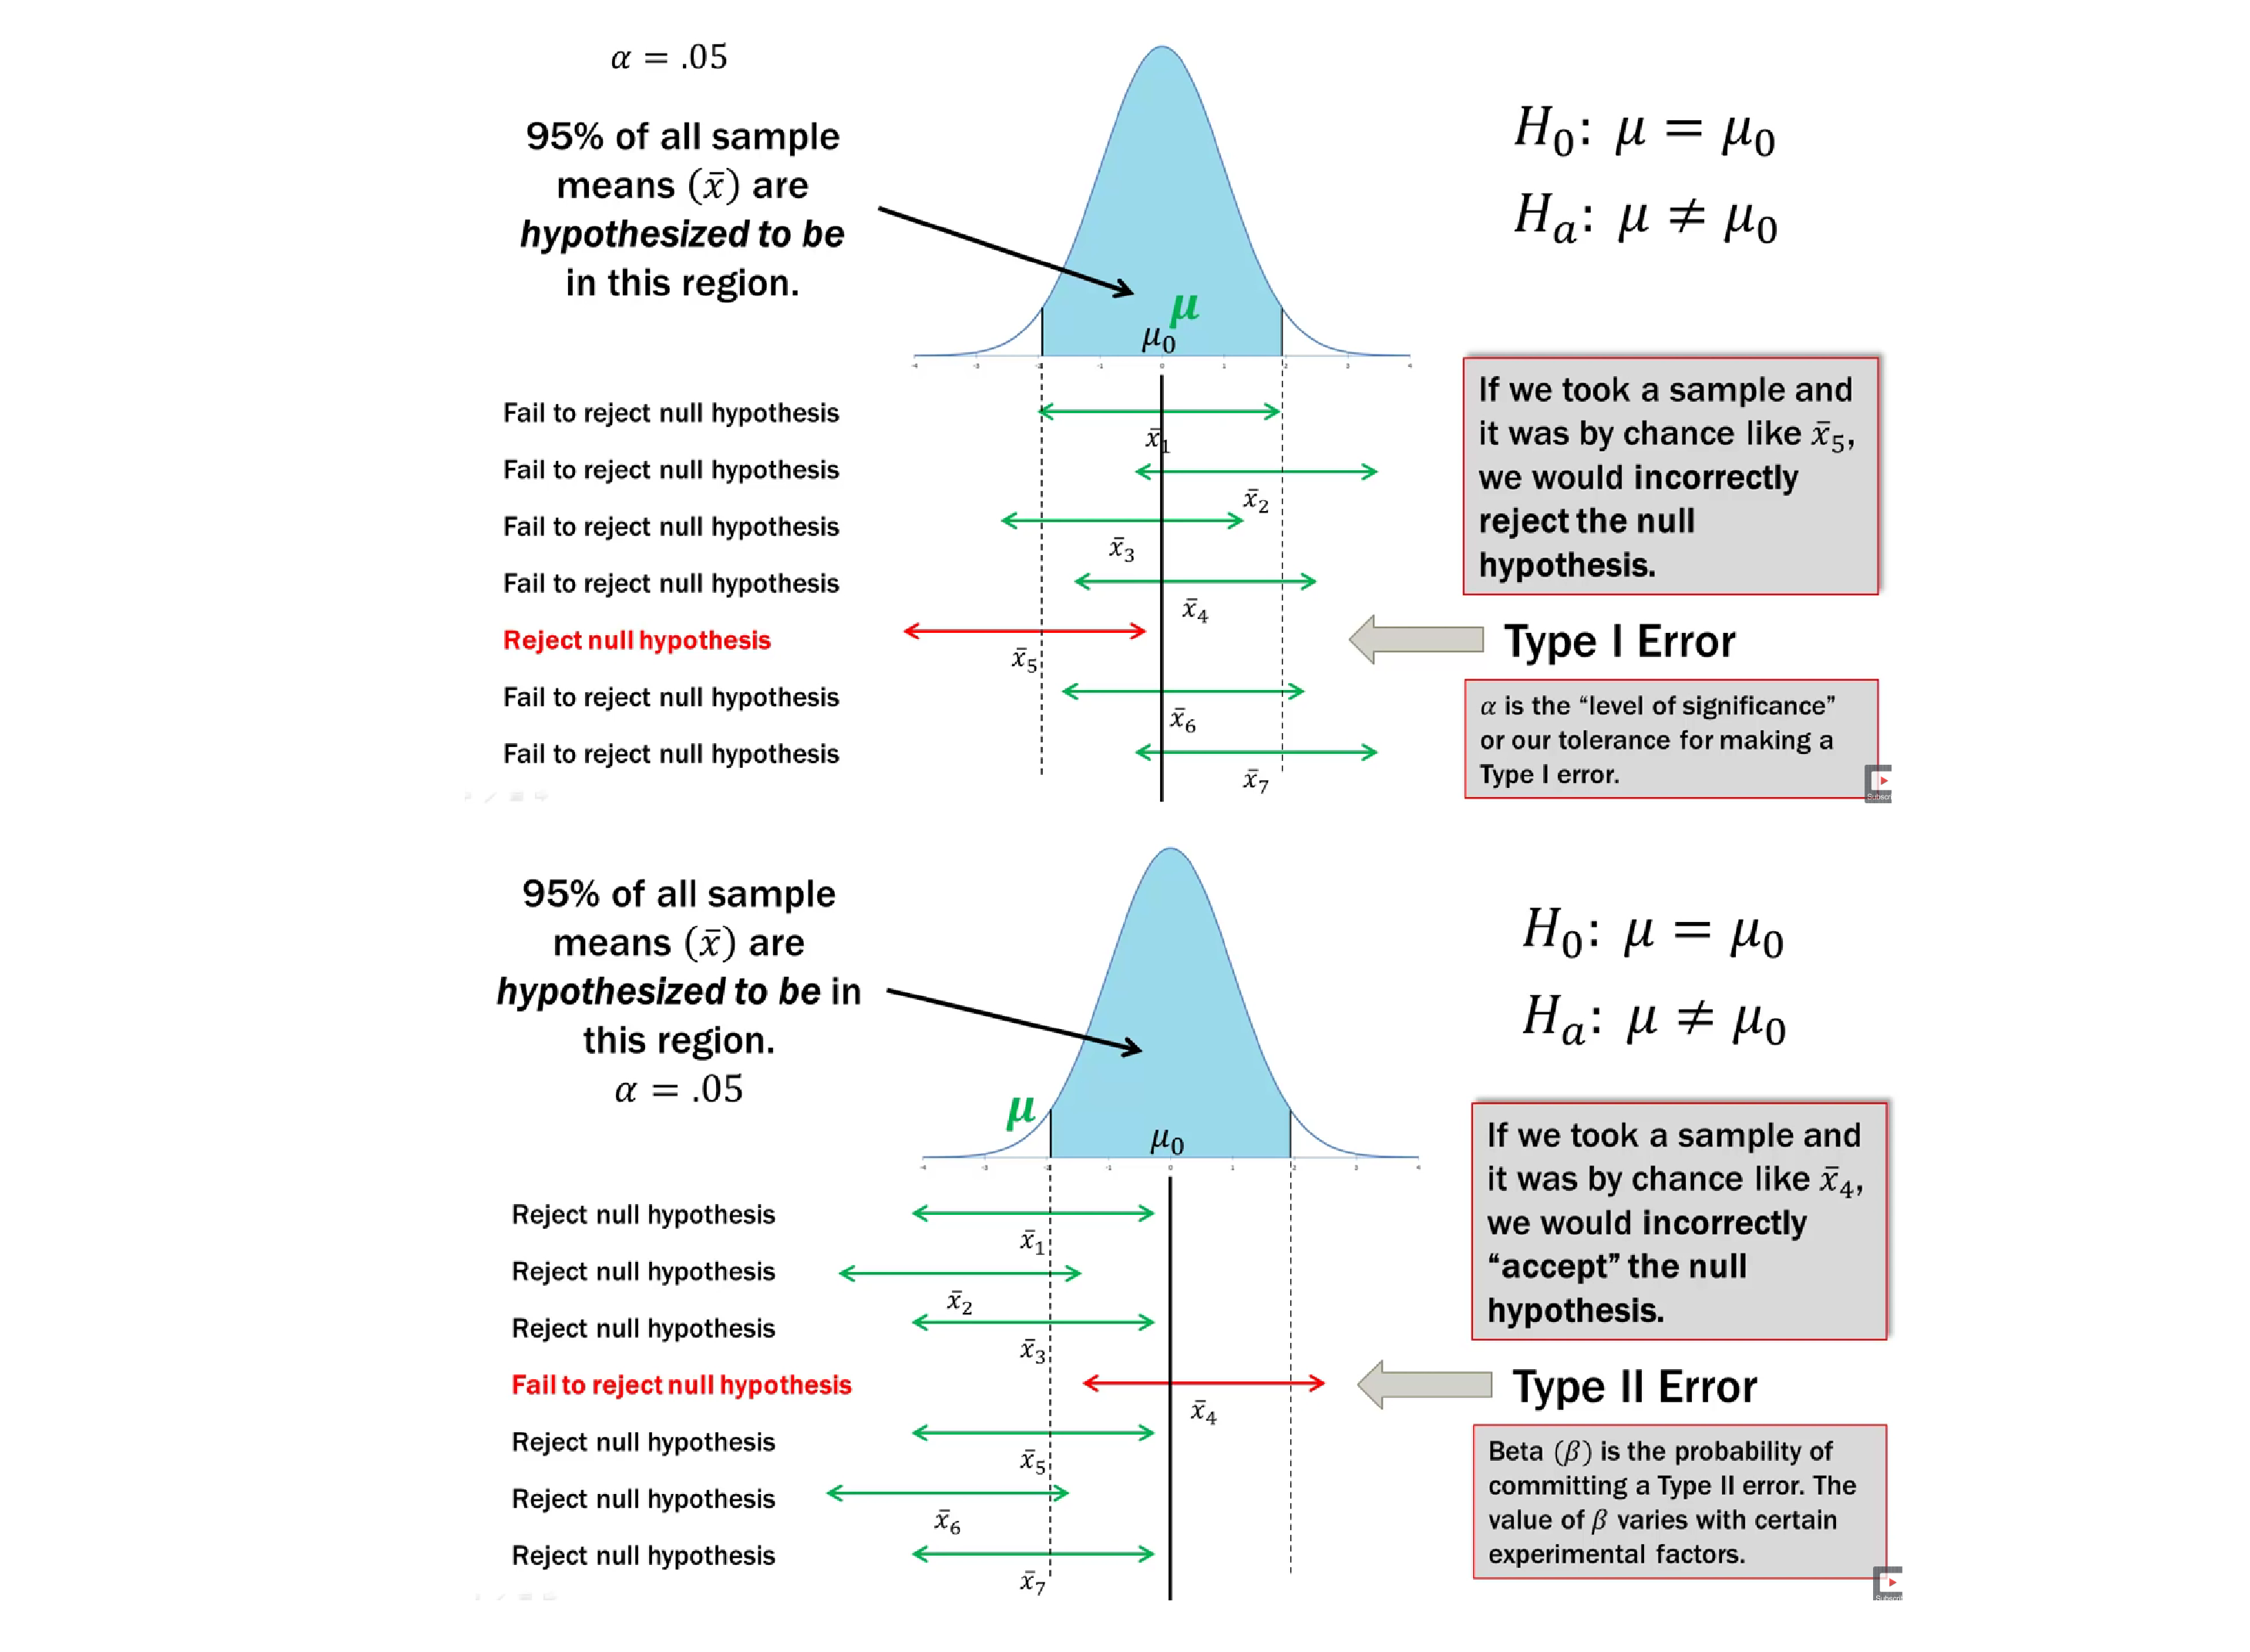

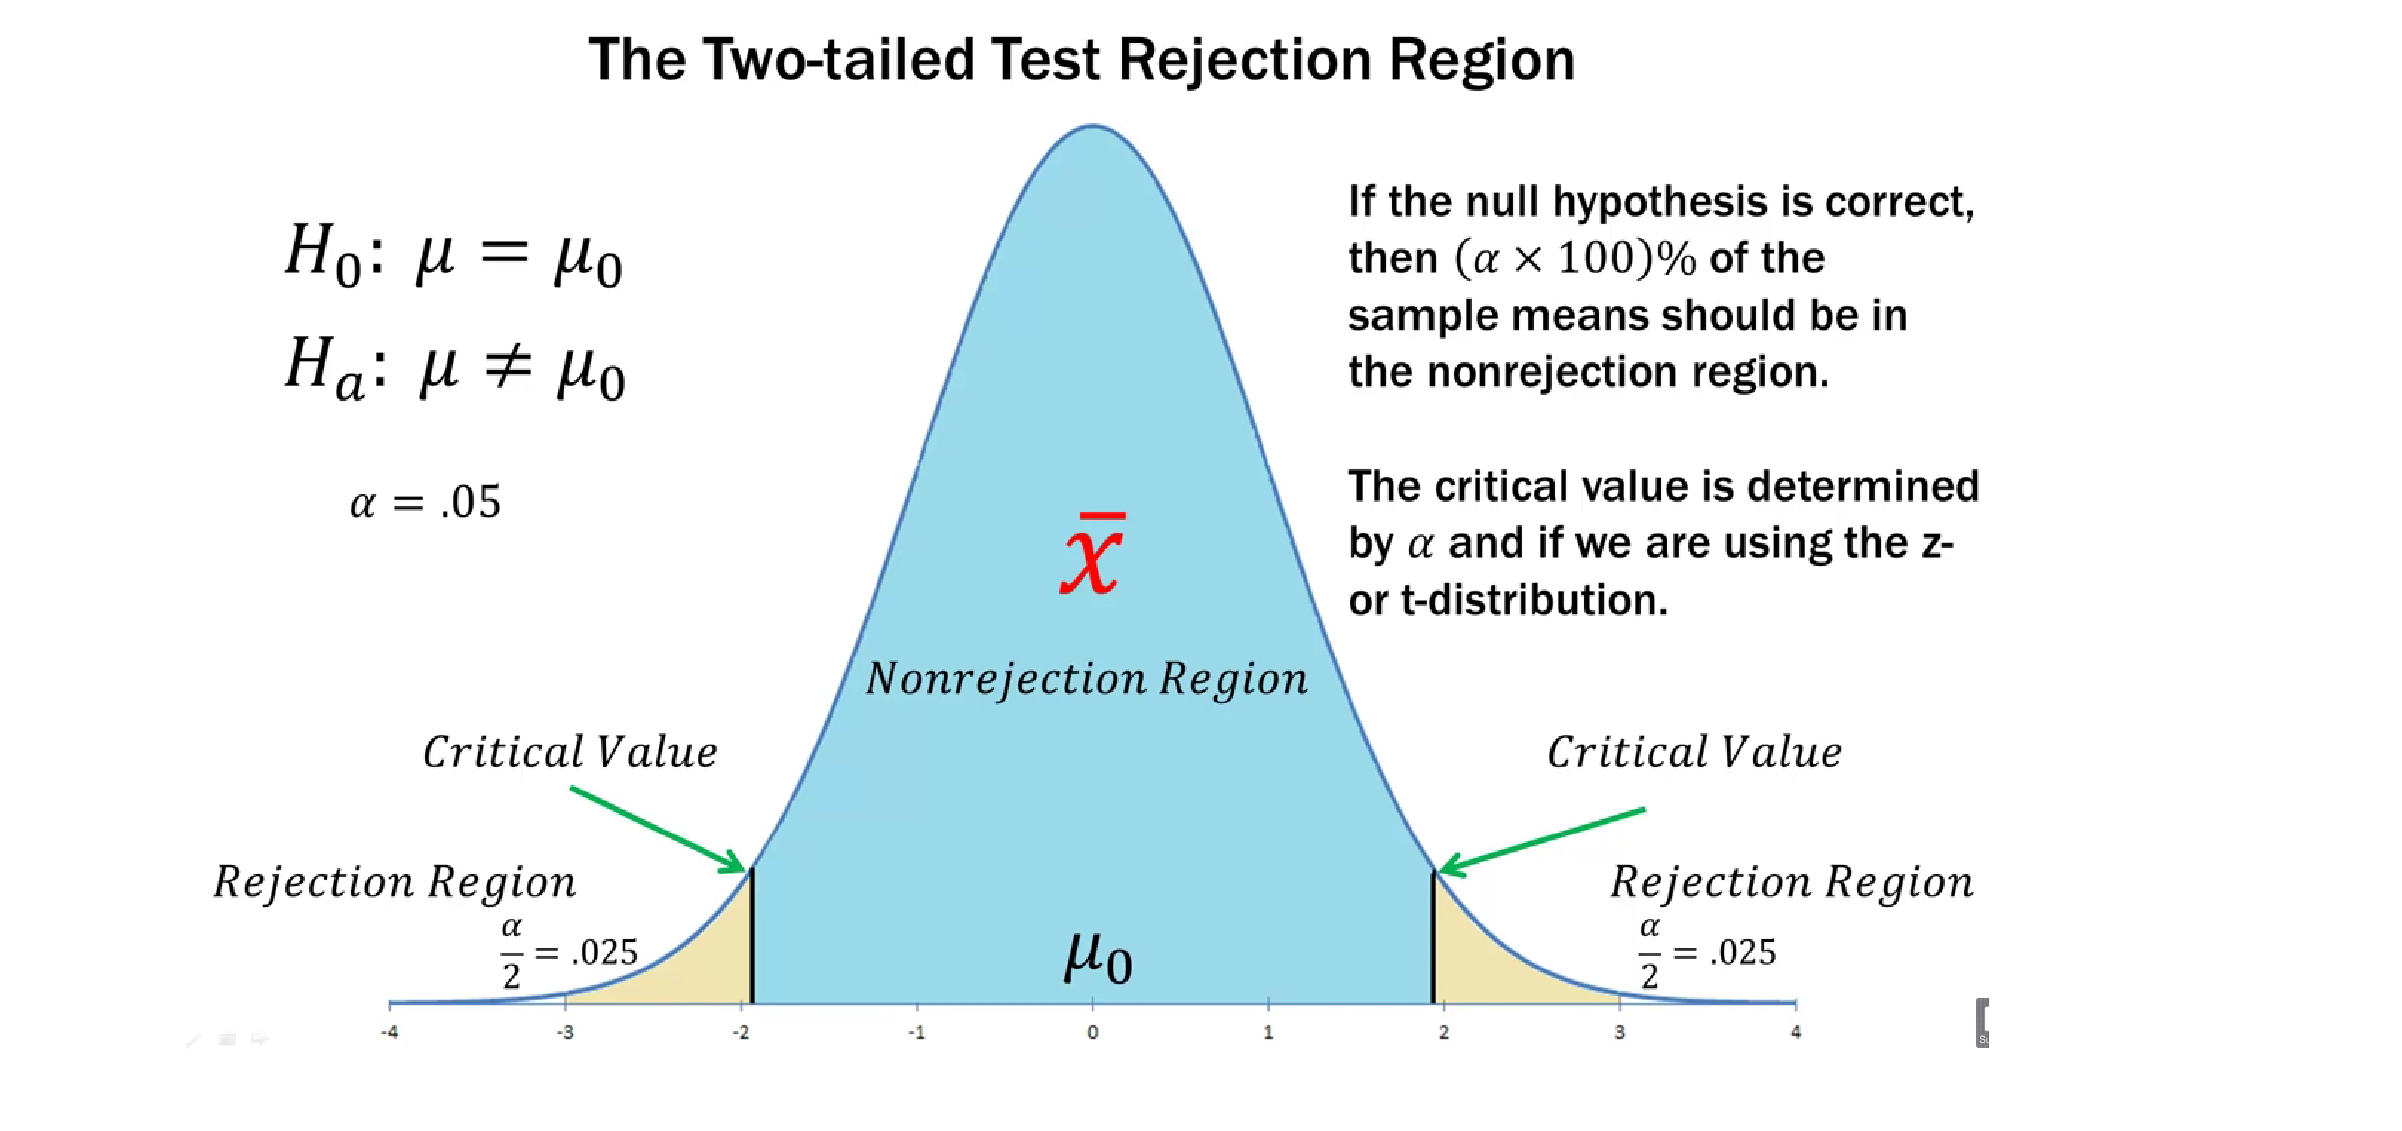

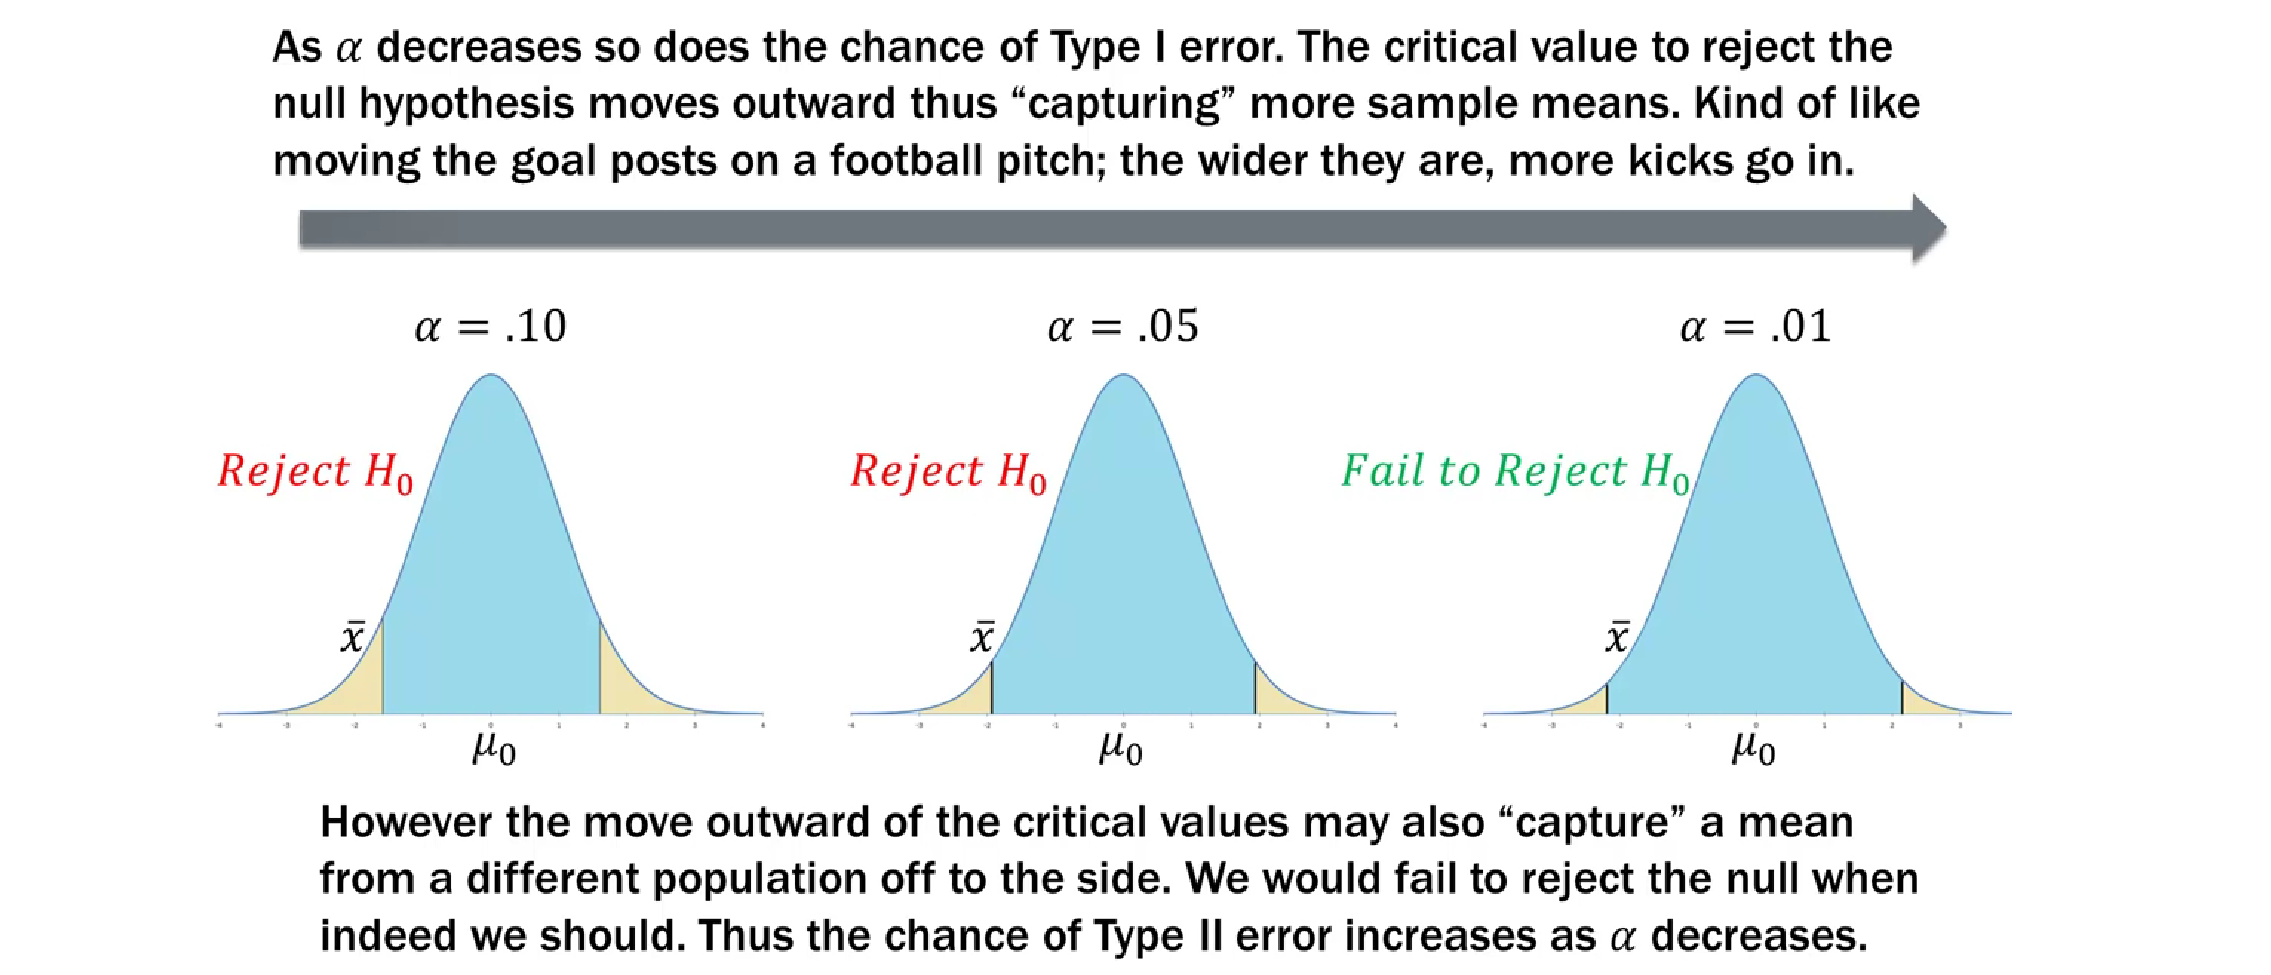

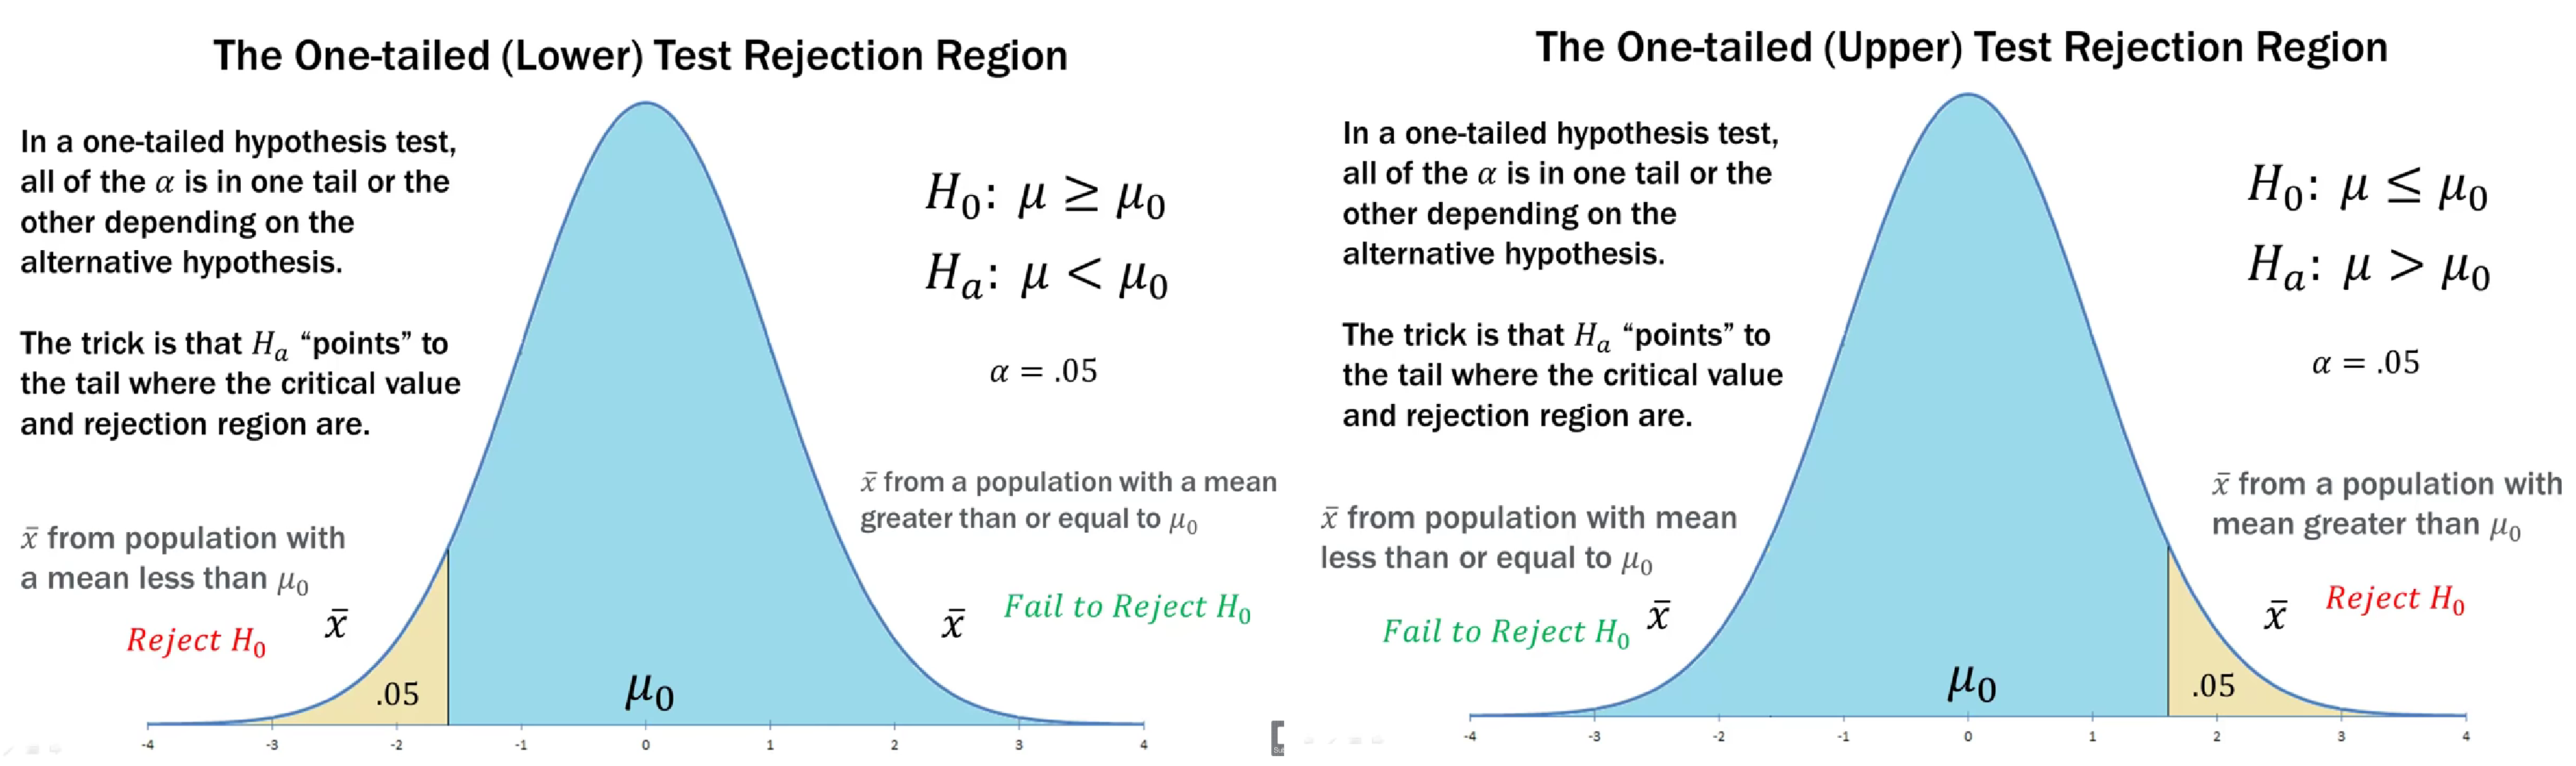

## Procedure  :
1. well developed, clear research problem or question 
2. establish hypothesis, null and alternative
3. determine appropriate statistical test and sampling distribution 
4. choose type 1 error rate (significance level alfa)
5. state the decision rule 
6. Gather sample data
7. calculate test statistic
8. state statistical conclusion
9. Make decision or inference based on conclusion 


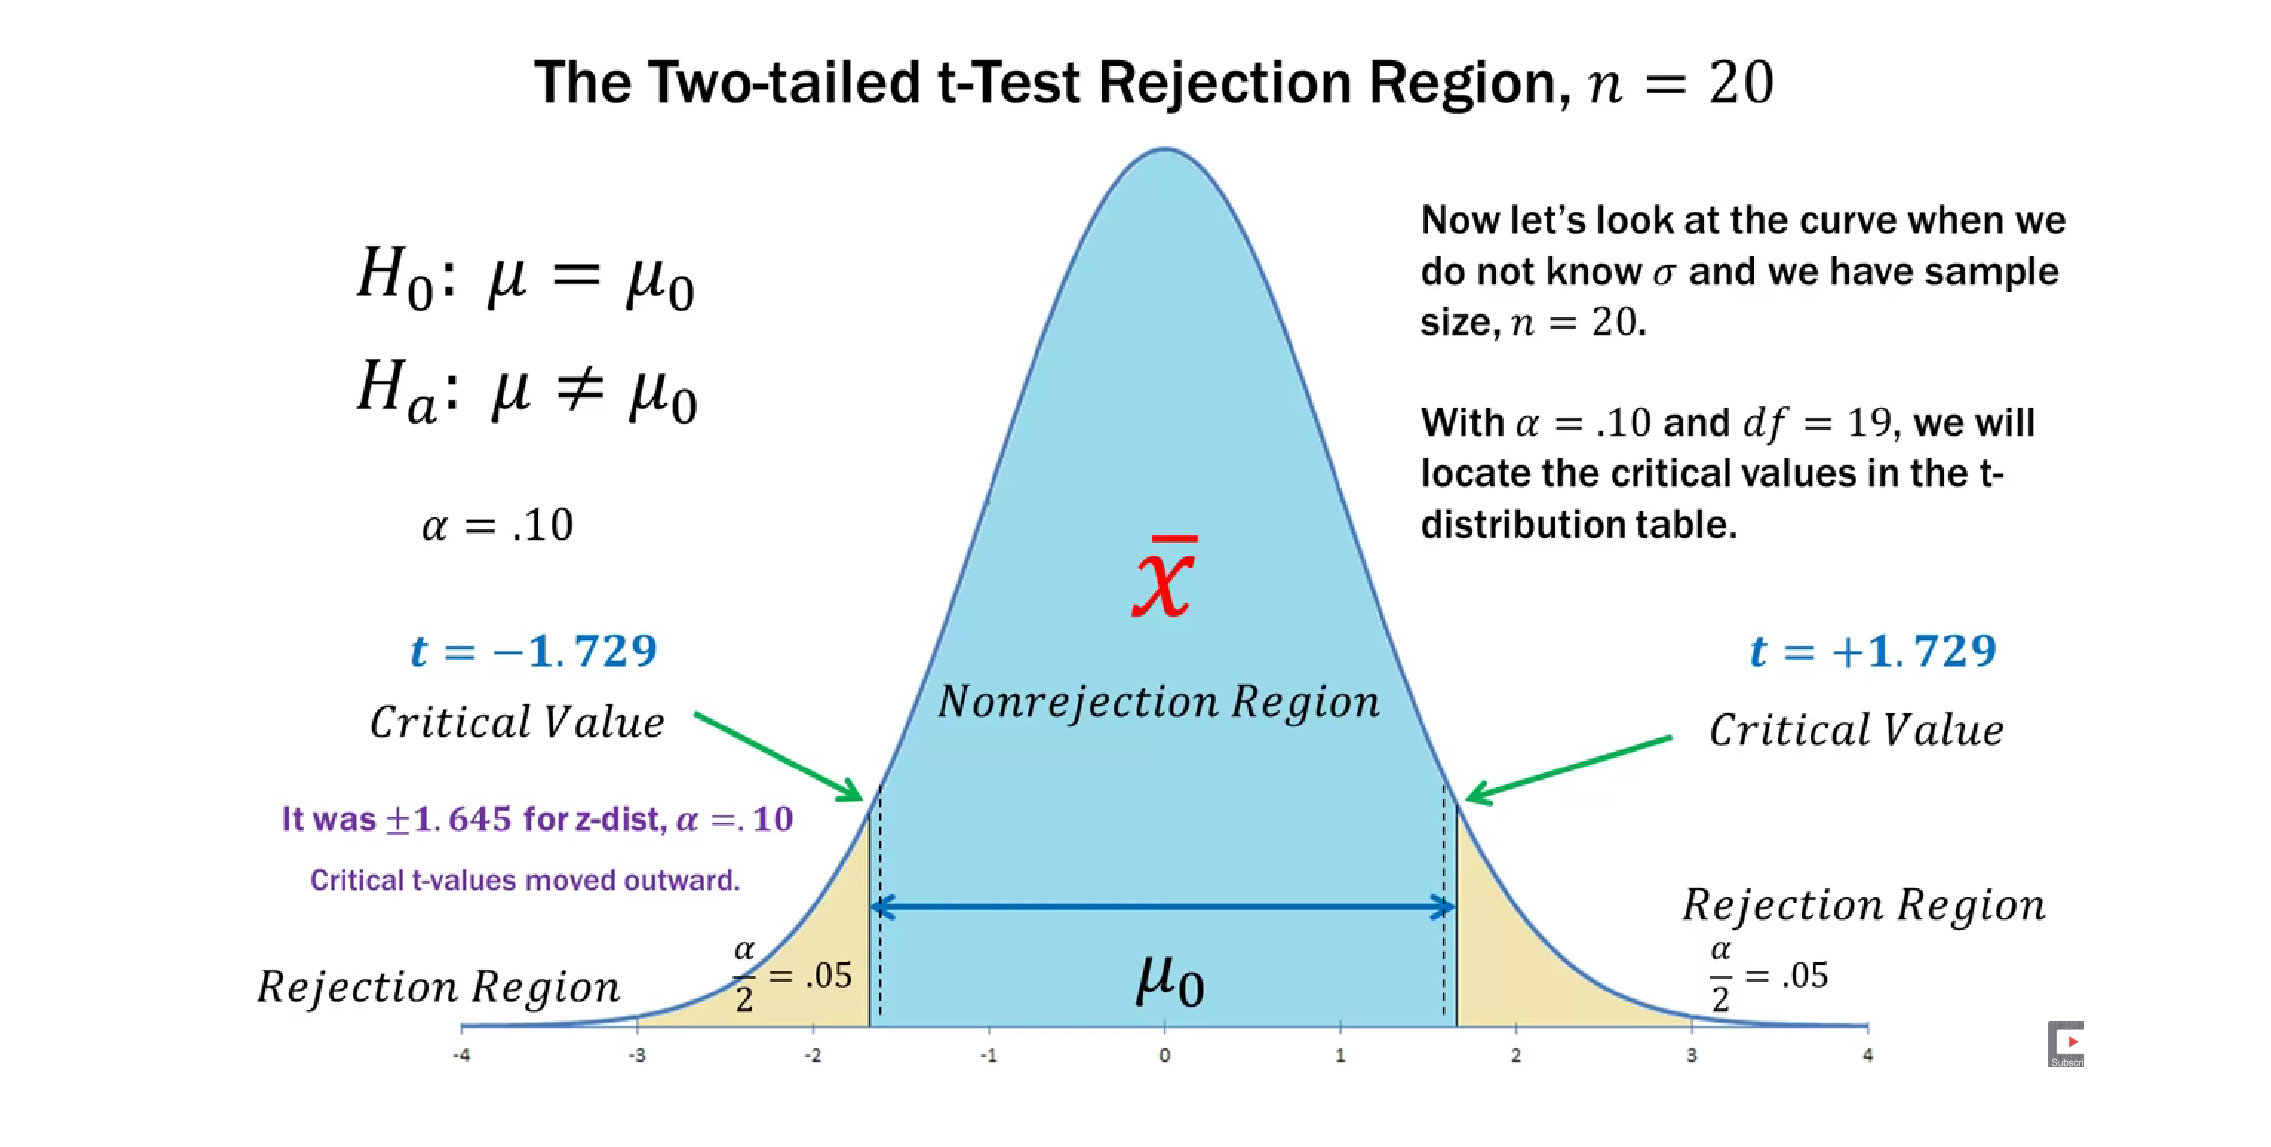

In [19]:
# visualising type 1 and type2 error . 
# with example 

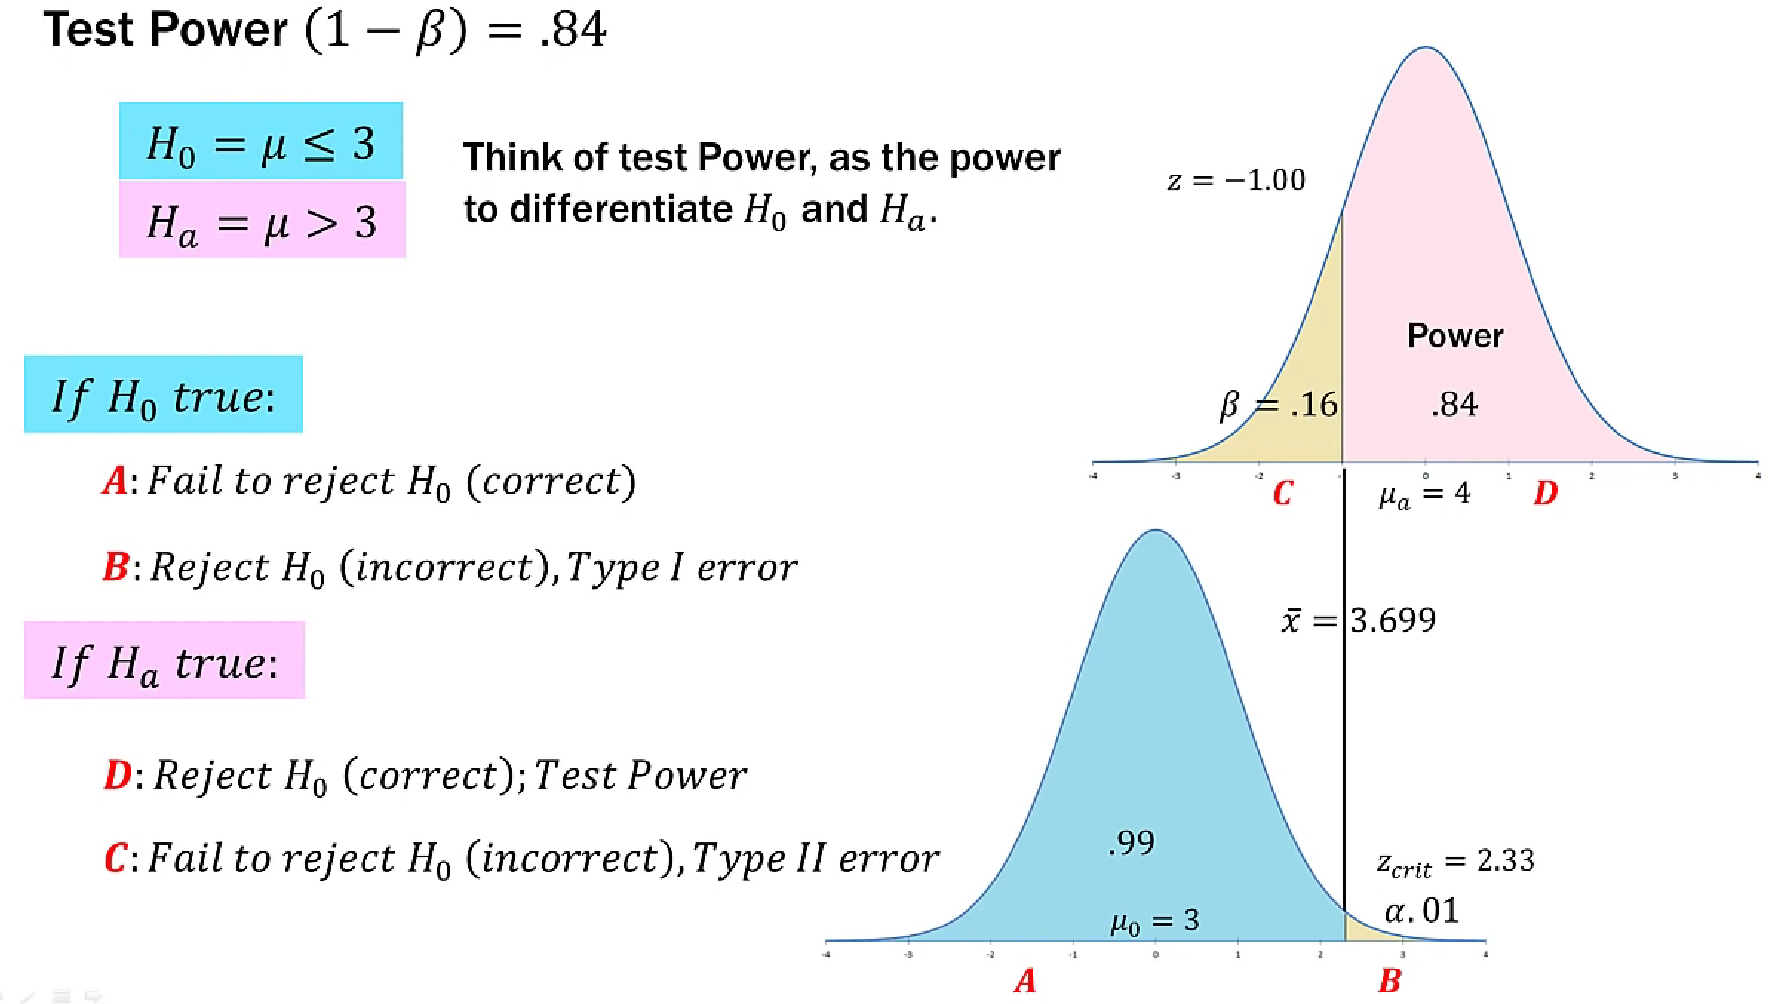

# z-test : 

- A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution.
- Z-tests test the mean of a distribution. For each significance level in the confidence interval, the Z-test has a single critical value (for example, 1.96 for 5% two tailed) which makes it more convenient than the Student's t-test whose critical values are defined by the sample size (through the corresponding degrees of freedom).
- Both the Z test and Student's t-test have similarities in that they both help determine the significance of a set of data. However, the z-test is rarely used in practice because the population deviation is difficult to determine.

# t-test: 

- The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis.

- A t-test is the most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known.
- When the scaling term is unknown and is replaced by an estimate based on the data, the test statistics (under certain conditions) follow a Student's t distribution.
- The t-test can be used, for example, to determine if the means of two sets of data are significantly different from each other.


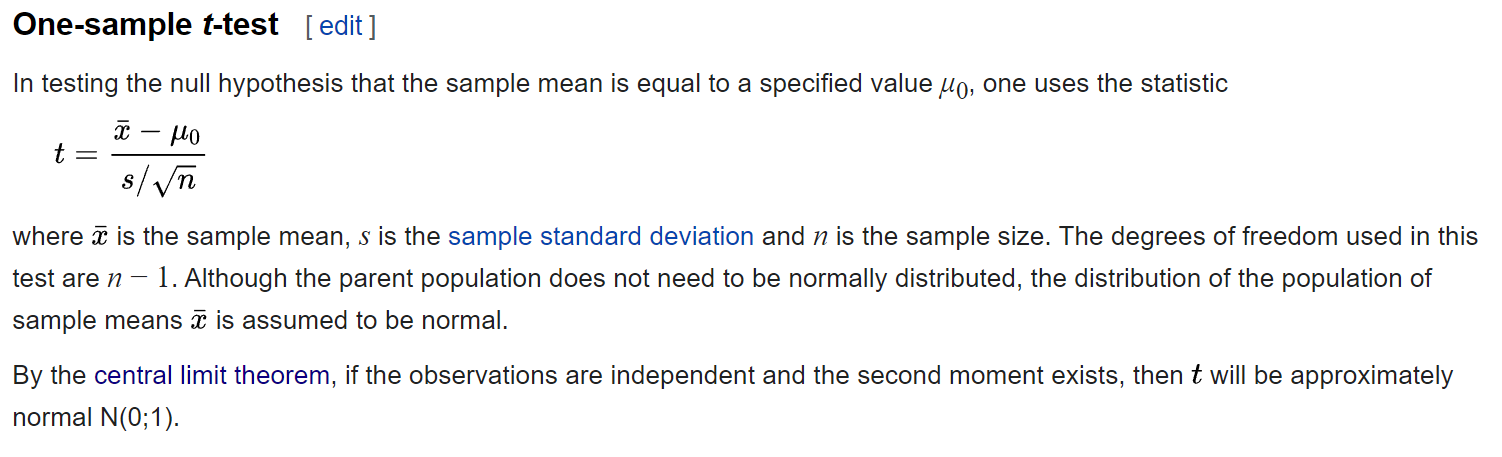

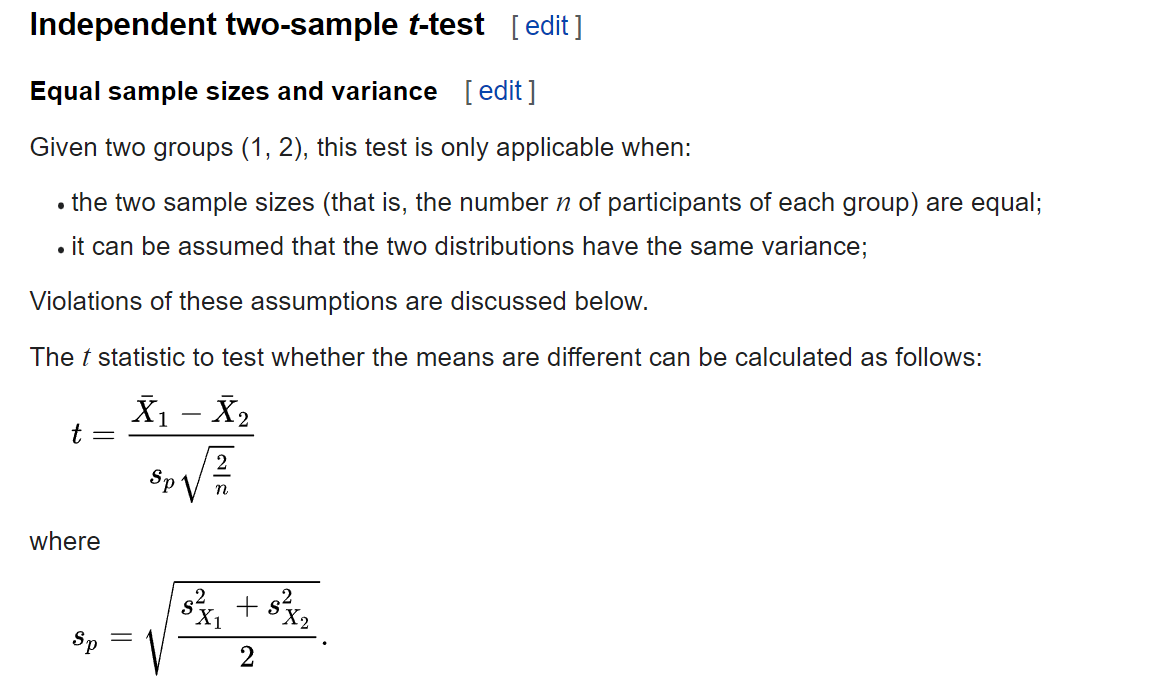

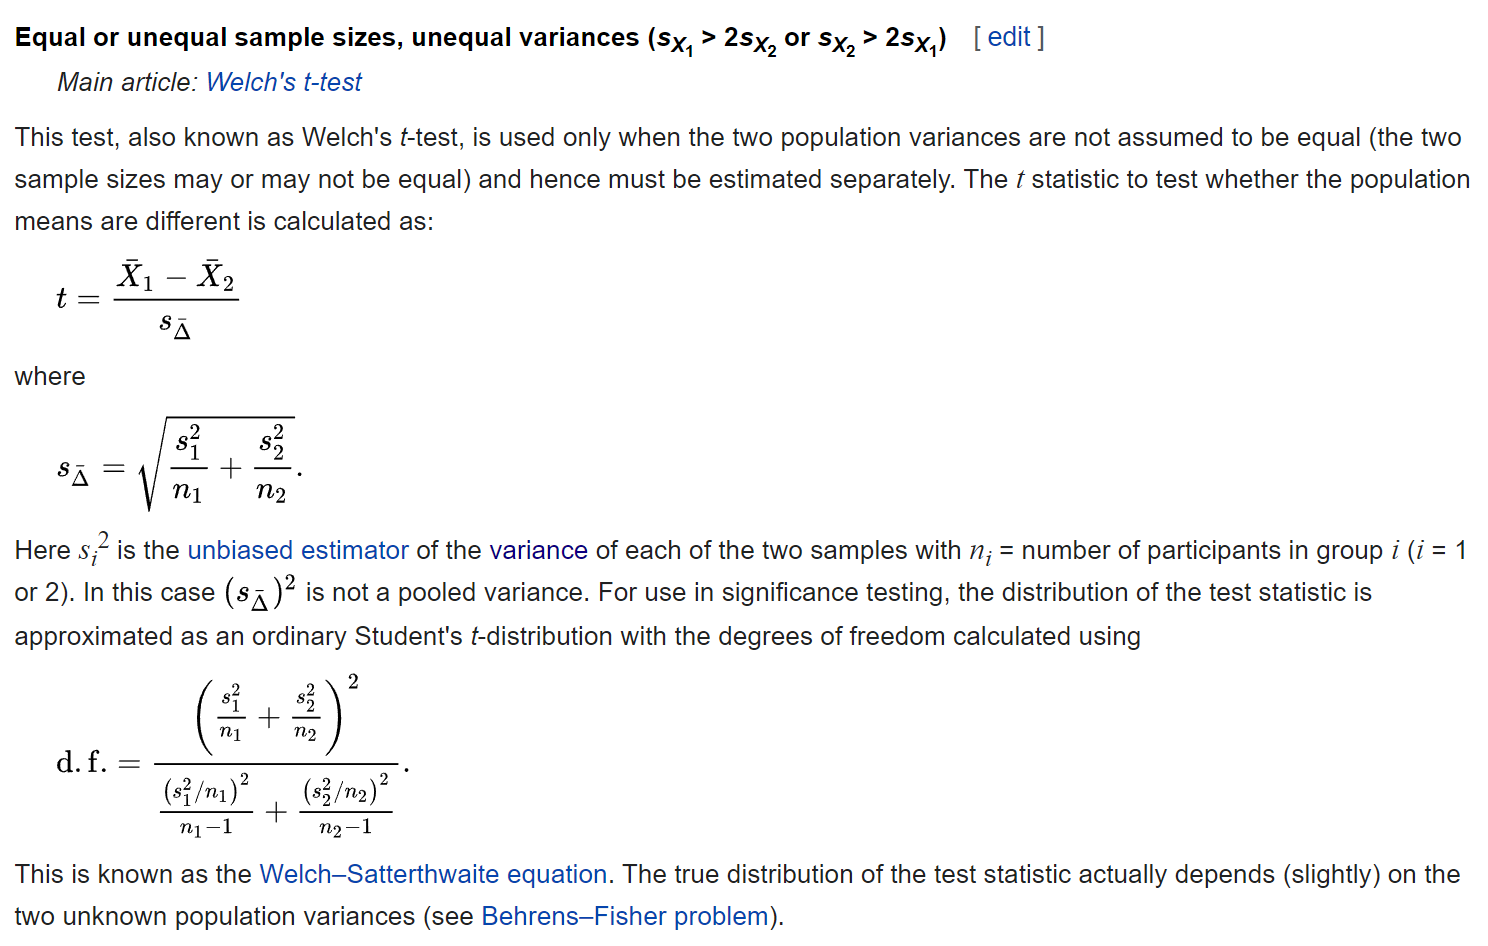

### p-value : 

    P[T is as extream as T-observed | H0]
    
   
### Critical Value : 
    
    T-critical is that value beyon which T-observed lies,  then we reject H0
    
    
   - ##### if p-value < alfa  : then we reject H0


# Lets say we have two medicine M1 and M2 : 
### Are the population means of M1 and M2 are same or not !
#### is µ1 = µ2 ? 


In [47]:
M1  = np.random.normal(5.5,1.5,100) 
M2  = np.random.normal(4.0,1.5,120) 

In [48]:
M1,M2 = M1[M1>0],M2[M2>0]

In [49]:
np.mean(M1),np.mean(M2)

(5.393063433110784, 3.979342551501084)

In [50]:
len(M1),len(M2)

(100, 120)

In [51]:
# M1,M2

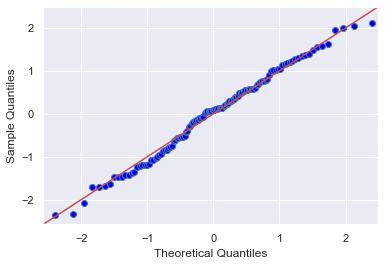

In [52]:
sm.qqplot(M2,fit=True,line="45")
plt.show()

defining hypothesis : 

H0 : µ1  =  µ2 

Ha : µ1 !=  µ2 

test : appropriate statistical test

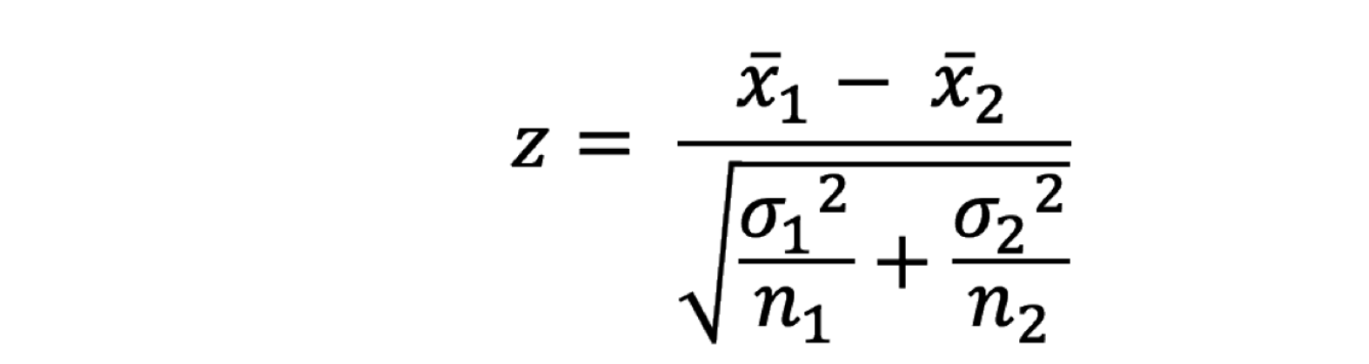

In [53]:
#T observed : Test Statistic: 


In [54]:
np.mean(M1)-np.mean(M2)

1.4137208816097004

In [55]:
np.sqrt((np.std(M1)**2/len(M1))+(np.std(M2)**2/len(M2)))

0.19999587457098464

In [56]:
T_observed = (np.mean(M1)-np.mean(M2))/(np.sqrt((np.std(M1)**2/len(M1))+(np.std(M2)**2/len(M2))))
T_observed

7.068750216184723

In [57]:
Significance_Level = 0.001

In [58]:
# p-value Calculation : 

In [59]:
p_value  = (norm.cdf(-T_observed))+(1-norm.cdf(T_observed))
p_value

1.5633843205489288e-12

In [60]:
if p_value < Significance_Level:
    print("Reject Null Hypothesis .  \nM1 and M2 mean recovery time is different.")
else:
    print("Failed to reject  Null Hypothesis. \nM1 and M2 mean recovery time is same.")

Reject Null Hypothesis .  
M1 and M2 mean recovery time is different.


In [61]:
# z-test

In [62]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(M1,M2)

(7.02275781336442, 2.1753109668670077e-12)

In [63]:
# t-test

In [64]:
stats.ttest_ind(M1,M2)

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=7.02275781336442, pvalue=2.731340313644647e-11)

In [65]:
# t-test | manual calculation 

In [66]:
p_value  = (t.cdf(-T_observed,len(M2)-1))+(1-t.cdf(T_observed,len(M2)-1))


In [67]:
p_value

1.1493162049491678e-10

In [68]:
(t.cdf(-T_observed,len(M2)-1))*2

1.149316212130078e-10

In [69]:
# Confidence Interval 

In [70]:
from statsmodels import stats as st

In [71]:
st.weightstats.zconfint(M1)

(5.1049783952864445, 5.681148470935124)

In [72]:
st.weightstats.zconfint(M2)

(3.710847296017342, 4.247837806984826)

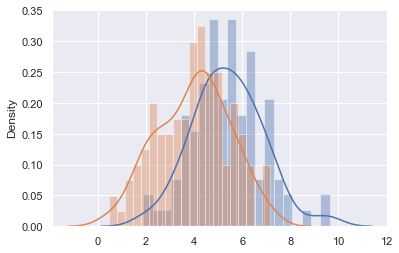

In [73]:
sns.distplot(M1,bins=20)
sns.distplot(M2,bins = 20)
plt.show()

# Control/Treatment Test : 

## A/B test : 
## Youtube wants to show two ads per ad break. Question is : does this reduce the watch time of users. 


In [74]:
# !gdown 1Hl96n6BWdl3ruJgCo_gaAWEb0kEYg__H

In [75]:
ab_test = pd.read_csv("ab_test_data.csv")

<IPython.core.display.Javascript object>

In [76]:
ab_test.sample(50)

date  customer_id  premium  watch_time_hrs customer_segmnt
5948   2018-05-02            0        0        1.265679         control
3960   2018-12-05          492        0        5.894386         control
8438   2018-10-16          107        1        1.502280         control
107    2018-04-21          303        0        2.497721         control
11488  2018-07-16          735        0        2.375099       treatment
9653   2018-11-03          720        1        0.739940       treatment
19841  2018-05-26          120        1        6.451907         control
2802   2018-11-10          219        0        4.112751         control
4731   2018-03-26          392        0        6.334764         control
10888  2018-05-03          277        1        9.743377         control
10610  2018-07-10          113        0        6.711333         control
8069   2018-10-07          370        0        2.502153         control
16554  2018-03-28          534        0        2.900522       treatment
7197   2018-02-17          831        0        6.201289       treatment
16656  2018-08-29          227        0        2.025717         control
15491  2018-10-10          498        0        1.893514         control
14831  2018-10-15          905        0        0.971322       treatment
7633   2018-11-25           41        0        2.958844         control
19135  2018-02-13          712        0        5.116079       treatment
12815  2018-02-22          556        0        2.098145       treatment
3830   2018-12-31          209        0        2.980817         control
7863   2018-03-03          621        0        2.716601       treatment
13298  2018-07-14          981        1        0.669727       treatment
1377   2018-01-16          520        1        1.850828       treatment
15992  2018-10-04          461        0        5.176676         control
15667  2018-11-11          457        0        1.214369         control
157    2018-02-23          792        0        2.168630       treatment
13299  2018-07-23          174        0        3.668023         control
17150  2018-03-06          913        0        3.807655       treatment
1435   2018-10-09          322        0        4.883164         control
5040   2018-02-10           74        0        2.434869         control
11883  2018-01-28          713        0        1.690627       treatment
456    2018-10-23          873        0        3.251529       treatment
7666   2018-04-16          631        0        6.610722       treatment
14654  2018-08-21          525        1        1.120458       treatment
14067  2018-06-08          184        0        2.181945         control
13050  2018-04-20          581        0        0.985501       treatment
7253   2018-08-23          699        0        2.981630       treatment
6737   2018-04-27          150        0        0.824687         control
12689  2018-01-12          503        0        3.693125       treatment
11048  2018-09-29           79        0        4.987178         control
2627   2018-08-15          928        0        3.771190       treatment
8318   2018-03-05          102        0        0.822379         control
16790  2018-09-11          666        1        5.797751       treatment
14880  2018-01-09          339        0        5.183193         control
7748   2018-05-21          653        0        2.000074       treatment
528    2018-11-26          146        1        1.348710         control
14785  2018-11-26          794        1        2.070867       treatment
7311   2018-04-02          676        1        5.772616       treatment
14202  2018-06-14          382        0        1.994653         control

In [77]:
# Group A --> Treatment Group shown 2 ads per ad-break
# Group B --> Control Group shown only 1 ad per ad break
# Let us comapre mean watch-times per group
# H0: mu1= mu2
# H1: mu1 != mu2

In [78]:
ab_test["customer_segmnt"].value_counts()

control      10000
treatment    10000
Name: customer_segmnt, dtype: int64

In [79]:
ab_test.describe()

customer_id       premium  watch_time_hrs
count  20000.000000  20000.000000    20000.000000
mean     499.001650      0.176750        9.362542
std      288.223444      0.381467      244.884839
min        0.000000      0.000000        0.160268
25%      249.000000      0.000000        1.678066
50%      500.000000      0.000000        2.670953
75%      747.000000      0.000000        4.204673
max      999.000000      1.000000    10007.648185

In [80]:
# watchtim max is 10007 which is very large , 
# some outliers are there in data. 


In [81]:
ab_test["watch_time_hrs"].quantile(0.998)

21.356607722117484

In [82]:
ab_test_ = ab_test[ab_test["watch_time_hrs"]<21.35]

In [83]:
ab_test_["customer_segmnt"].value_counts()

treatment    9987
control      9972
Name: customer_segmnt, dtype: int64

<AxesSubplot:xlabel='watch_time_hrs', ylabel='Count'>

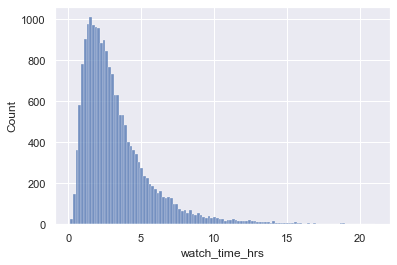

In [84]:
sns.histplot(ab_test_["watch_time_hrs"])

In [85]:
ab_test_Control_group = ab_test_[ab_test_["customer_segmnt"]=="control"]
ab_test_Treatment_group = ab_test_[ab_test_["customer_segmnt"]=="treatment"]

In [86]:
ab_test_Control_group.shape[0],ab_test_Treatment_group.shape[0]

(9972, 9987)

In [87]:
# 2 sample z-test as n1 and n2 are large enough

In [88]:
ztest(ab_test_Control_group["watch_time_hrs"],ab_test_Treatment_group["watch_time_hrs"])

(15.929230308092993, 3.972164249409601e-57)

In [89]:
stats.ttest_ind(ab_test_Control_group["watch_time_hrs"],ab_test_Treatment_group["watch_time_hrs"])

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=15.929230308092993, pvalue=8.89403204471507e-57)

In [90]:
# ztest 
# manually 

In [91]:
M1 = ab_test_Control_group["watch_time_hrs"]
M2 = ab_test_Treatment_group["watch_time_hrs"]

In [92]:
T_observed = (np.mean(M1)-np.mean(M2))/(np.sqrt((np.std(M1)**2/len(M1))+(np.std(M2)**2/len(M2))))


In [93]:
T_observed

15.927683239449623

In [94]:
p_value  = (norm.cdf(-T_observed))+(1-norm.cdf(T_observed))
p_value

2.035828187228015e-57

In [95]:
if p_value < 0.05:
    print("Reject Null Hypothesis .  \nM1 and M2 mean watch time is different.")
else:
    print("Failed to reject  Null Hypothesis. \nM1 and M2 mean watch time is same.")

Reject Null Hypothesis .  
M1 and M2 mean watch time is different.



- z-test fails under : 
1. CLT assumptions are broken
2. n1 and n2 are <30
3. samples standard deviations are unknown or unestimatable

In [96]:
# log transformation 

In [97]:
ab_test = pd.read_csv("ab_test_data.csv")

<IPython.core.display.Javascript object>

In [98]:
ab_test_ = ab_test[ab_test["watch_time_hrs"]<21.35]

In [99]:
ab_test_Control_group = ab_test_[ab_test_["customer_segmnt"]=="control"]
ab_test_Treatment_group = ab_test_[ab_test_["customer_segmnt"]=="treatment"]

<AxesSubplot:xlabel='watch_time_hrs', ylabel='Density'>

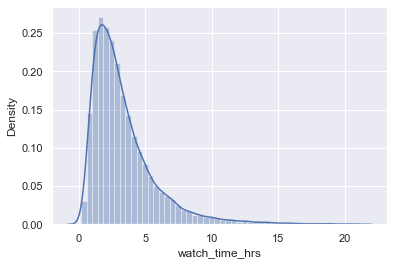

In [100]:
sns.distplot(ab_test_["watch_time_hrs"])

<AxesSubplot:xlabel='watch_time_hrs', ylabel='Density'>

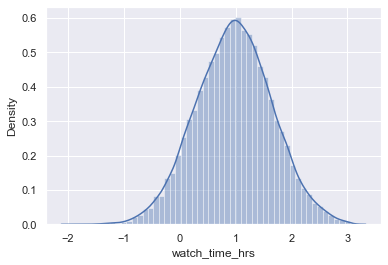

In [101]:
sns.distplot(np.log(ab_test_["watch_time_hrs"]))

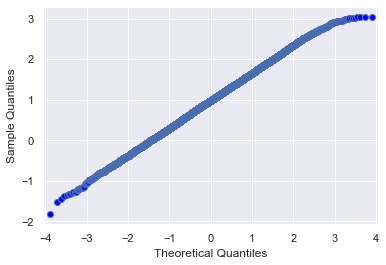

In [102]:
sm.qqplot(np.log(ab_test_["watch_time_hrs"]))
plt.show()

In [103]:
ztest(ab_test_Control_group["watch_time_hrs"],ab_test_Treatment_group["watch_time_hrs"])

(15.929230308092993, 3.972164249409601e-57)

In [104]:
# log normal transformation and finding out the p-value and t-statistic. 

In [105]:
ztest(np.log(ab_test_Control_group["watch_time_hrs"]),np.log(ab_test_Treatment_group["watch_time_hrs"]))

(15.644051289389123, 3.647647888115501e-55)

In [106]:
# Importing Required Libraries
from math import sqrt
from numpy.random import seed
from numpy.random import randn
import numpy as np
from scipy.stats import sem
from scipy.stats import t

def independent_ttest(data1, data2):
    '''
    input:
    data1 -> contains a python list signifying first data distribution
    data2 -> contains a python list signifying second data distribution
    output:
    t_stat -> a float value signifying the t_stat value
    p -> a float value signifying the p value
    '''

        
    n1 = len(data1)
    n2 = len(data2)
    s1,s2 = np.std(data1,ddof=1),np.std(data2,ddof=1)
    df = (((s1**2/n1)+(s2**2/n2))**2)/((1/(n1-1))*(s1**2/n1)**2 + (1/(n2-1))*(s2**2/n2)**2)
        
    T_observed = (np.mean(data1)-np.mean(data2))/(np.sqrt((np.std(data1)**2/(n1))+(np.std(data2)**2/(n2))))
    T_criticalL = t.ppf(0.05,df)
    T_criticalR = t.ppf(0.975,df)
    p_value  = (t.cdf(-T_observed,df))+(1-t.cdf(T_observed,df))

    if p_value < 0.05 :
        print("Reject the null hypothesis that concludes the means are unequal.")
    else:
        print("Fail to reject the null hypothesis that concludes the means are equal.")
    
    if T_observed < T_criticalL or T_observed > T_criticalR:
        print("Reject the null hypothesis that concludes the means are unequal.")
    else:
        print("Fail to reject the null hypothesis that concludes the means are equal.")

    return T_observed,p_value

In [107]:
data1 = pd.Series([float(i) for i in "33.12 21.94 22.36 19.63 29.33 13.49 33.72 21.19 26.59 23.75".split()])
data2 = pd.Series([float(i) for i in "32.31 14.70 23.39 23.08 30.67 19.50 24.14 20.61 25.21 27.91".split()])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
# data1 = data2

In [109]:
stats.ttest_ind(data1,data2)

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.13894959619424968, pvalue=0.8910327665371376)

In [110]:
independent_ttest(data1,data2)

Fail to reject the null hypothesis that concludes the means are equal.
Fail to reject the null hypothesis that concludes the means are equal.


(0.146465734644831, 0.8852304614128113)

In [111]:
# Importing Required Libraries
from math import sqrt
from numpy.random import seed
from numpy.random import randn
import numpy as np
from scipy.stats import sem
from scipy.stats import t

def independent_ttest(data1, data2):
    '''
    input:
    data1 -> contains a python list signifying first data distribution
    data2 -> contains a python list signifying second data distribution
    output:
    t_stat -> a float value signifying the t_stat value
    p -> a float value signifying the p value
    '''

        
    n1 = len(data1)
    n2 = len(data2)
    s1,s2 = np.std(data1),np.std(data2)
    df = n1+n2-2
        
    T_observed = (np.mean(data1)-np.mean(data2))  /  ( np.sqrt( (s1**2/n1 )+(s2**2/n2)))

    p_value  = 2* (1- t.cdf(abs(T_observed),df))
    print(T_observed)

    # print(T_observed)

    # if p_value < 0.05 :
    #     print("Reject the null hypothesis that concludes the means are unequal.")
    # else:
    #     print("Fail to reject the null hypothesis that concludes the means are equal.")
    
    # if T_observed < T_criticalL or T_observed > T_criticalR:
    #     print("Reject the null hypothesis that concludes the means are unequal.")
    # else:
    #     print("Fail to reject the null hypothesis that concludes the means are equal.")

    return T_observed,p_value

In [112]:
data1 = pd.Series([float(i) for i in "33.12 21.94 22.36 19.63 29.33 13.49 33.72 21.19 26.59 23.75".split()])
data2 = pd.Series([float(i) for i in "32.31 14.70 23.39 23.08 30.67 19.50 24.14 20.61 25.21 27.91".split()])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
independent_ttest(data1,data2)

0.146465734644831


(0.146465734644831, 0.885181637822585)

In [134]:
# Importing Required Libraries
from math import sqrt
from numpy.random import seed
from numpy.random import randn
import numpy as np
from scipy.stats import sem
from scipy.stats import t

def independent_ttest_LeftTailed(n1,mean1,s1,n2,mean2,s2):
    
        
    df = (((s1**2/n1)+(s2**2/n2))**2)/((1/(n1-1))*(s1**2/n1)**2 + (1/(n2-1))*(s2**2/n2)**2)
        
    T_observed = (mean1-mean2)/(np.sqrt((s1**2/(n1))+(s2**2/(n2))))
    T_criticalL = t.ppf(0.05,df)
    p_value  = (t.cdf(-T_observed,df))
    print(T_criticalL)
    if p_value < 0.05 :
        print("Reject the null hypothesis that concludes the means are unequal.")
    else:
        print("Fail to reject the null hypothesis that concludes the means are equal.")
    
    if T_observed > T_criticalL :
        print("Reject the null hypothesis that concludes the means are unequal.")
    else:
        print("Fail to reject the null hypothesis that concludes the means are equal.")

    return T_observed,p_value

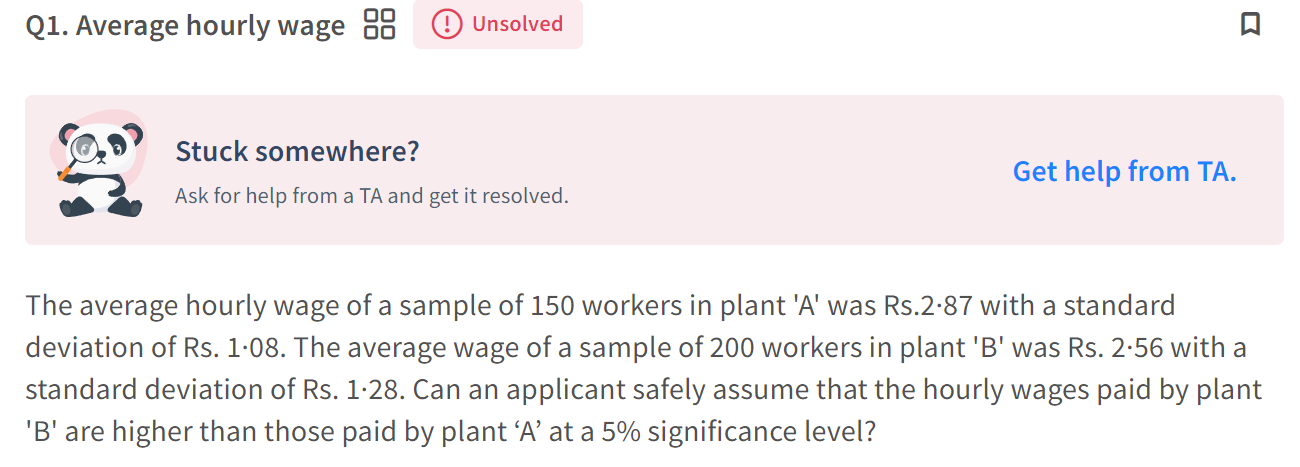

In [135]:
independent_ttest_LeftTailed(150,2.87,1.08,200,2.56,1.28)

-1.649306218577583
Reject the null hypothesis that concludes the means are unequal.
Reject the null hypothesis that concludes the means are unequal.


(2.453219634102559, 0.007327626407888468)

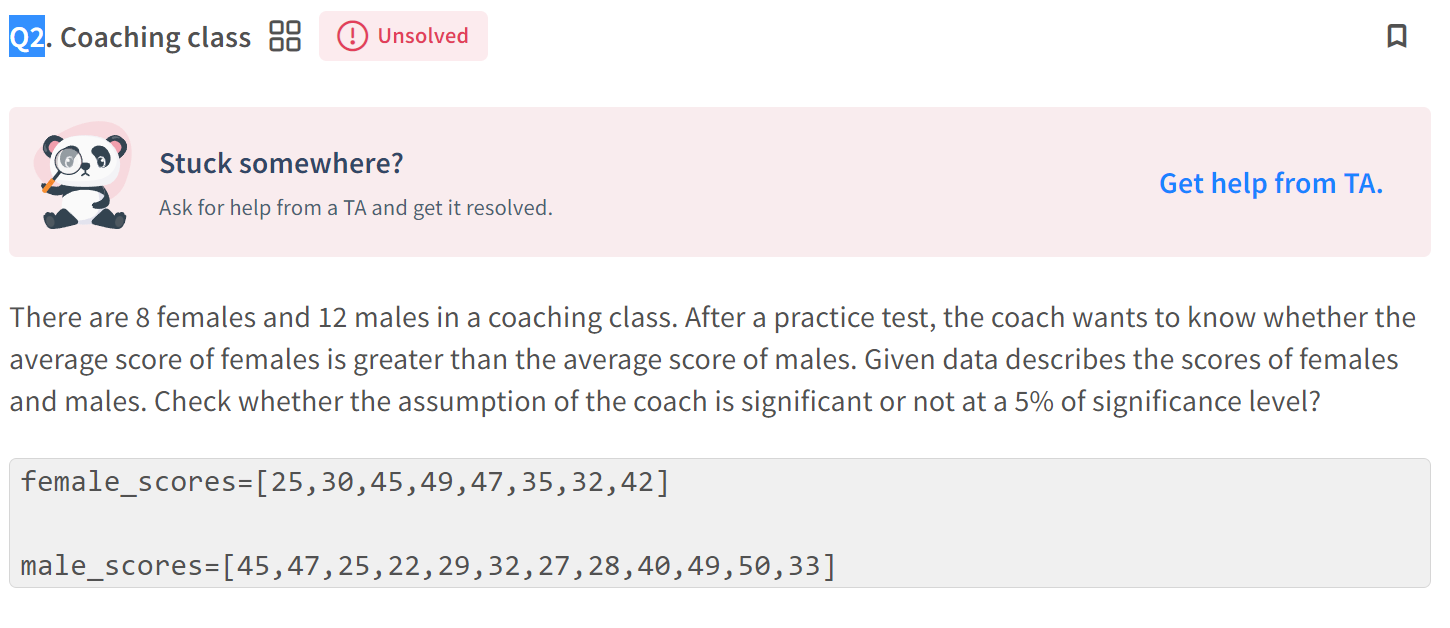

In [118]:
female_scores=[25,30,45,49,47,35,32,42]

male_scores=[45,47,25,22,29,32,27,28,40,49,50,33]

In [119]:
n1 = len(female_scores)
n2 = len(male_scores)
mean1 = np.mean(female_scores)
mean2 = np.mean(male_scores)
s1 = np.std(female_scores)
s2 = np.std(male_scores)

In [120]:
df = n1+n2-2
        
T_observed = (mean1-mean2)/(np.sqrt((s1**2/(n1))+(s2**2/(n2))))
T_criticalR = t.ppf(0.975,df)
p_value  = (t.cdf(-T_observed,df))
print(df)
print(T_observed)
print(T_criticalR)
p_value


18
0.6301215241177877
2.10092204024096


0.2682665277972176

In [121]:
if p_value < 0.05:
    print("reject null")
else:
    print("failed to reject")

failed to reject


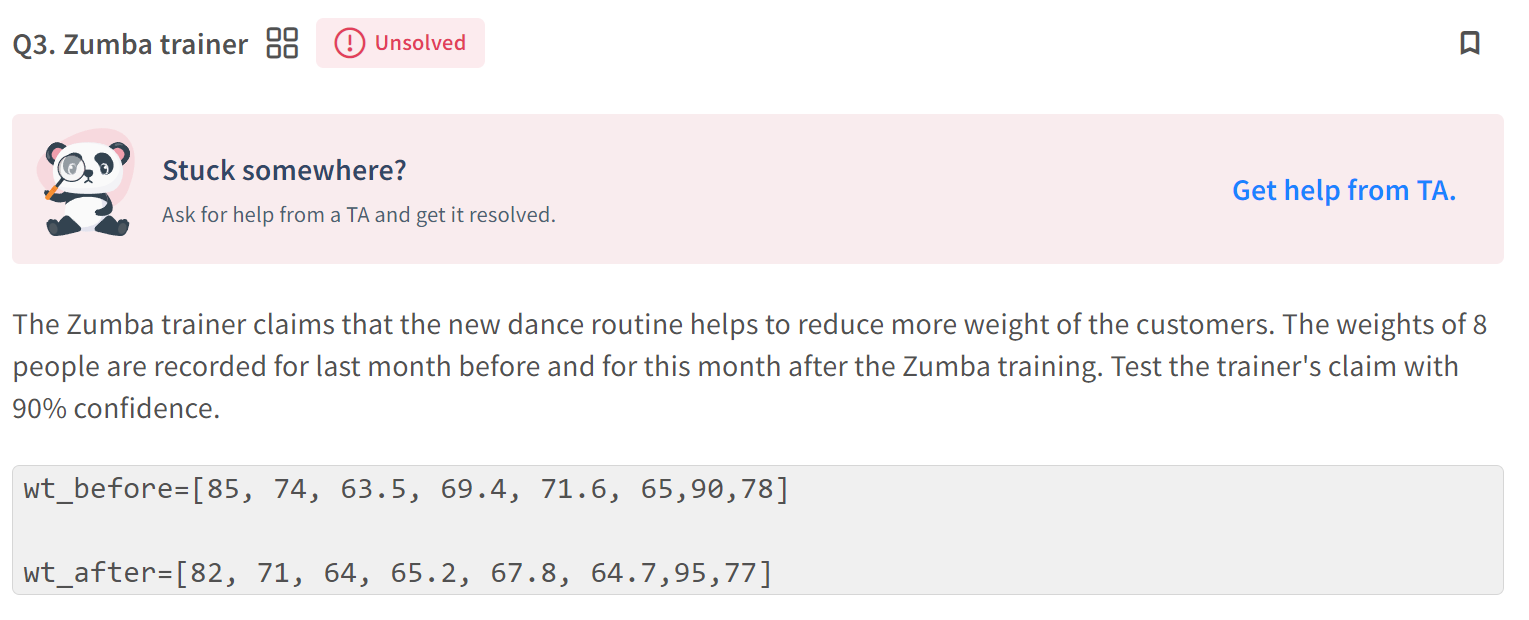

In [122]:

wt_before=pd.Series([85, 74, 63.5, 69.4, 71.6, 65,   90,  78])
wt_after=pd.Series([ 82,  71, 64,   65.2, 67.8, 64.7, 95,  77])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
df = pd.DataFrame([wt_after,wt_before]).T
df

<IPython.core.display.Javascript object>

0     1
0  82.0  85.0
1  71.0  74.0
2  64.0  63.5
3  65.2  69.4
4  67.8  71.6
5  64.7  65.0
6  95.0  90.0
7  77.0  78.0

In [124]:
df["D"] = df[1]-df[0]

In [125]:
df

0     1    D
0  82.0  85.0  3.0
1  71.0  74.0  3.0
2  64.0  63.5 -0.5
3  65.2  69.4  4.2
4  67.8  71.6  3.8
5  64.7  65.0  0.3
6  95.0  90.0 -5.0
7  77.0  78.0  1.0

In [126]:
data = df["D"]

In [127]:
data.mean()

1.2249999999999996

In [128]:
data.std()

3.033503396593262

In [129]:
(1.22-0)/(3.033/np.sqrt(8))

1.1377121965678707

In [130]:
1.14

1.14

In [131]:
stats.t.ppf(0.90,7)

<IPython.core.display.Javascript object>

1.4149239276488585

In [132]:
stats.ttest_rel(df[0],df[1])

<IPython.core.display.Javascript object>

Ttest_relResult(statistic=-1.142185379355503, pvalue=0.29093617002652783)

In [133]:
2*(1-stats.t.cdf(1.14,len(df)-1))

<IPython.core.display.Javascript object>

0.2917866221067258